In [1]:
#Loading the required libraries

import pandas as pd
import numpy as np

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn import tree
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

from sklearn import metrics
# Libraries for Model-Building
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
#Shows a quick statistic summary of your data using describe

data.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [4]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
# Handling Missing Data

#Missing value analysis and dropping the records with missing values

#identify total no. of null values for each column
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [4]:
target_variable=data['diabetes']
target_variable

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [5]:
data=data.drop(['diabetes'], axis=1)

In [6]:
#checking categorical columns(object type)
data_c=data.select_dtypes(include=['object'])
print(data_c.columns)
data_c

Index(['gender', 'smoking_history'], dtype='object')


,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current
...,...,...
99995,Female,No Info
99996,Female,No Info
99997,Male,former
99998,Female,never


In [7]:
categorical_Attributes = data.select_dtypes(include=['object']).columns
categorical_Attributes

Index(['gender', 'smoking_history'], dtype='object')

In [8]:
data = pd.get_dummies(columns=categorical_Attributes, data=data, prefix=categorical_Attributes, prefix_sep="_", drop_first=False)
print (data.columns, data.shape)

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object') (100000, 15)


In [9]:
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,0,1,0,0,0,0


In [10]:
#Split the data in to train and test

X_train, X_test, y_train, y_test = train_test_split(data, target_variable, test_size=0.25,random_state=123)

In [11]:
X_train.shape

(75000, 15)

In [12]:
y_train.shape

(75000,)

In [13]:
X_train.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')

In [14]:
#recursive feature elimination technique
from sklearn.feature_selection import RFE

DT=tree.DecisionTreeClassifier(random_state=42)

rfe_DT=RFE(DT,n_features_to_select=5,verbose=21)

rfe_DT.fit(X_train,y_train)

names=X_train.columns.tolist()

b=rfe_DT.ranking_

#RFE: Recursive Feature Elimination is corresponding to Machine Learning Model.
#ranking is a attribute

a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])

#a.to_csv('feature_selection.csv')

RFE_selected=a['features'][a['rank']==1]

RFE_selected

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


0              HbA1c_level
1                      age
2      blood_glucose_level
3                      bmi
4    smoking_history_never
Name: features, dtype: object

In [15]:
X_train=X_train[RFE_selected]
X_test=X_test[RFE_selected]

In [16]:
X_test.shape,X_train.shape

((25000, 5), (75000, 5))

In [17]:
#Building a Basic Decision Tree Model

#default decision tree algorithm
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
from sklearn.linear_model import LogisticRegression

clf_LR = LogisticRegression(random_state=10)
clf_LR.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [19]:
# we can build modle with default algorithms for as mnay algos as possible

clf

DecisionTreeClassifier()

In [20]:
#Predicting on Train and Test
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [21]:
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
test_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [23]:
#Getting evaluation metrics and evaluating model performance

confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)

#True values vs Model predicted

[[68665    10]
 [  207  6118]]


In [24]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[22170   655]
 [  601  1574]]


In [25]:
#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.9998543866035675
Train TPR:  0.9672727272727273
Train Accuracy:  0.9971066666666667


In [26]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1]) #Recall

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9713033953997809
Test TPR:  0.7236781609195402
Test Accuracy:  0.94976


In [27]:
clf.feature_importances_

array([0.50401512, 0.06771814, 0.27236259, 0.13935889, 0.01654527])

In [28]:
importances = clf.feature_importances_

In [29]:
importances.shape

(5,)

In [30]:
data.shape

(100000, 15)

In [31]:
df_imp=pd.DataFrame({'features':X_train.columns,'imortances':clf.feature_importances_})

df_imp=df_imp.sort_values(by='imortances',ascending=False)

df_imp

,features,imortances
0,HbA1c_level,0.504015
2,blood_glucose_level,0.272363
3,bmi,0.139359
1,age,0.067718
4,smoking_history_never,0.016545


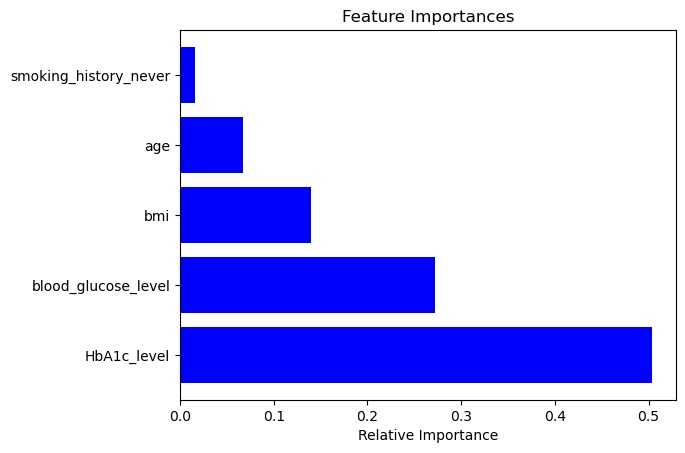

In [32]:
#Ploting the Feature importances
plt.title('Feature Importances')
plt.barh(df_imp['features'], df_imp['imortances'], color='blue')
plt.yticks(df_imp['features'])
plt.xlabel('Relative Importance')
plt.show()

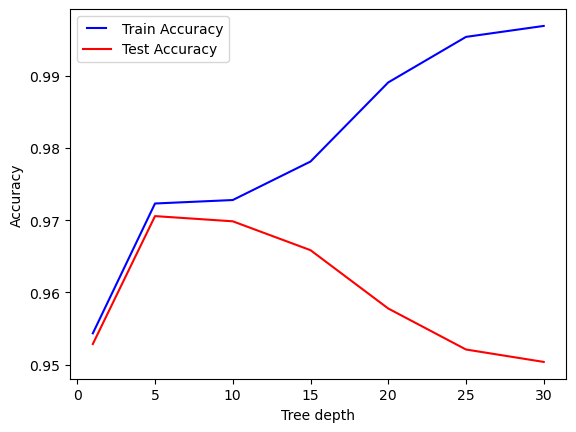

In [55]:
#How do we arrive at the best tree depth for this data?
max_depths = [1,5,10,15,20,25,30]

train_results = []
test_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

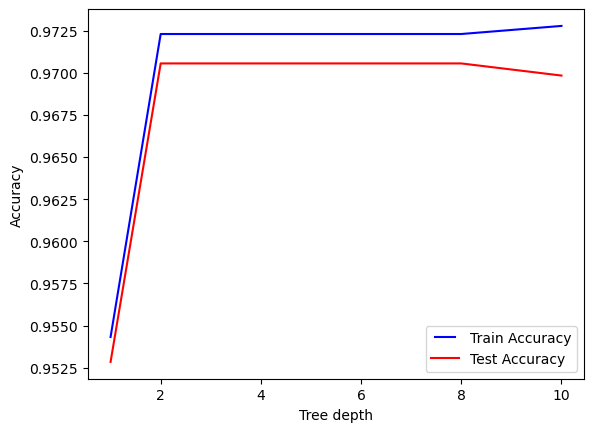

In [57]:
#How do we arrive at the best tree depth for this data?
max_depths = [1,2,4,6,8,10]

train_results = []
test_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

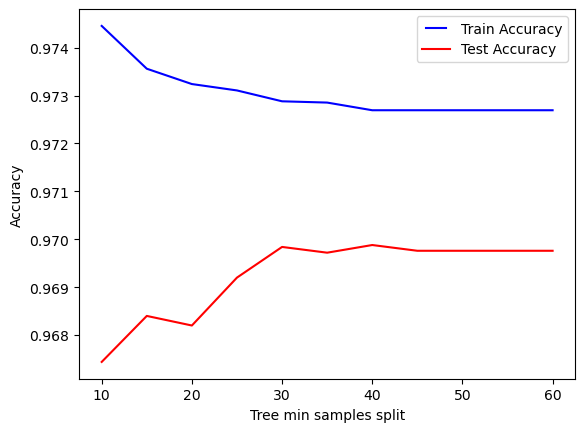

In [58]:
#How do we arrive at the best tree min_samples_leaf for this data?
#min_samples_leaf = np.linspace(2, 31, 30, endpoint=True)

min_samples_leafs=[10,15,20,25,30,35,40,45,50,55,60]

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min samples split')
plt.show()

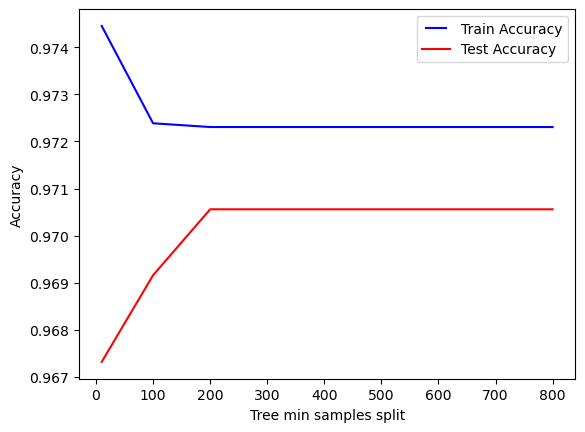

In [62]:
#How do we arrive at the best tree min_samples_leaf for this data?
#min_samples_leaf = np.linspace(2, 31, 30, endpoint=True)

min_samples_leafs=[10,100,200,300,400,500,600,800]

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min samples split')
plt.show()

In [105]:
#set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2,3,4,5,6,7,8],
              "min_samples_leaf": [50,100,150,200,250],
              "max_leaf_nodes": [None, 50, 60, 70],
              }

In [106]:
#Use the GridSearchCV
dt = tree.DecisionTreeClassifier() #estimator
clf2 = GridSearchCV(dt, param_grid, cv=3)
clf2.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': [None, 50, 60, 70],
                         'min_samples_leaf': [50, 100, 150, 200, 250],
                         'min_samples_split': [2, 10, 20]})

In [107]:
clf2.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=50, min_samples_leaf=50)

In [108]:
import pickle as pk

my_first_out=open('DTC_pickle_file_withRFE.pickle','wb')

pk.dump(clf2.best_estimator_,my_first_out)

my_first_out.close()


In [109]:
my_first_out

<_io.BufferedWriter name='DTC_pickle_file_withRFE.pickle'>

In [144]:
clf2.cv_results_

{'mean_fit_time': array([0.45883767, 0.44231121, 0.53842751, 0.46144565, 0.46220231,
        0.478501  , 0.42028062, 0.42750716, 0.50562119, 0.41764585,
        0.44915787, 0.49017223, 0.40684621, 0.4438645 , 0.39527138,
        0.38820163, 0.37625575, 0.35245085, 0.37935376, 0.38480902,
        0.36868334, 0.37308661, 0.37262805, 0.4172895 , 0.42238204,
        0.41807357, 0.45053736, 0.40920337, 0.42946196, 0.3966945 ,
        0.35472242, 0.44544419, 0.4568704 , 0.4348526 , 0.47782715,
        0.40641149, 0.4503293 , 0.42392993, 0.41926495, 0.42184687,
        0.43113057, 0.48206592, 0.50418973, 0.48335862, 0.45962763,
        0.40344922, 0.42553067, 0.42207162, 0.44702967, 0.40705689,
        0.43430368, 0.46186574, 0.46099329, 0.43230573, 0.40910165,
        0.42583068, 0.42478347, 0.44845716, 0.43372766, 0.44005036,
        0.13379908, 0.14653603, 0.17028554, 0.1620992 , 0.1517415 ,
        0.14954599, 0.13781786, 0.16663472, 0.15796232, 0.17048653,
        0.14257391, 0.14803672,

In [37]:
#Predicting on Train and Test
train_pred = clf2.predict(X_train)
test_pred = clf2.predict(X_test)

In [38]:
#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Train TNR:  0.9988350928285402
Train TPR:  0.6888537549407114
Train Accuracy:  0.9726933333333333
Test TNR:  0.9980722891566265
Test TPR:  0.6726436781609195
Test Accuracy:  0.96976


In [69]:
df_imp=pd.DataFrame({'features':X_train.columns,'imortances':clf2.best_estimator_.feature_importances_})

df_imp=df_imp.sort_values(by='imortances',ascending=False)

df_imp

,features,imortances
0,HbA1c_level,0.628485
2,blood_glucose_level,0.324973
3,bmi,0.025149
1,age,0.020885
4,smoking_history_never,0.000507


In [39]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
TP = confusion_matrix_train[1,1] # true positive 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives
dtc_result_train={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}

    

In [40]:
dtc_result_train

{'accuracy': 0.973,
 'recall': 0.689,
 'precision': 0.982,
 'FPR': 0.001,
 'specificity': 0.999}

In [41]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
TP = confusion_matrix_test[1,1] # true positive 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives
dtc_result_test={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}

    

In [42]:
dtc_result_test

{'accuracy': 0.97,
 'recall': 0.673,
 'precision': 0.971,
 'FPR': 0.002,
 'specificity': 0.998}

In [151]:
import plotly.graph_objects as go
# Plotting
metrics = list(dtc_result_train.keys())
values_train = list(dtc_result_train.values())
values_test = list(dtc_result_test.values())

fig = go.Figure()
fig.add_trace(go.Bar(x=metrics, y=values_train,marker_color='#9467bd', name='Training Result'))
fig.add_trace(go.Bar(x=metrics, y=values_test,marker_color='#e377c2', name='Test Result'))

fig.update_layout(
    title=' Decision Tree Classifier Model Performance',
    xaxis_title='Evaluation metrics',
    yaxis_title='Model Performance',
    barmode='group'
)

fig.show()

In [50]:
def get_predictions(X_train,y_train):
    y_train_pred_final = pd.DataFrame({'Diabetes':y_train.values, 'Diabetes_Prob':clf2.predict_proba(X_train)[:,1]})
    y_train_pred_final['Patient_ID'] = y_train.index
    y_train_pred_final = y_train_pred_final.reindex(['Patient_ID','Diabetes','Diabetes_Prob'], axis=1)
    y_train_pred_final['predicted'] = y_train_pred_final.Diabetes_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final
    
y_train_pred_final=get_predictions(X_train,y_train)    
# Let's see the head
y_train_pred_final

,Patient_ID,Diabetes,Diabetes_Prob,predicted
0,31450,0,0.0,0
1,42809,0,0.0,0
2,52419,0,0.0,0
3,45663,0,0.0,0
4,50696,0,0.0,0
...,...,...,...,...
74995,63206,0,0.0,0
74996,61404,0,0.0,0
74997,17730,0,0.0,0
74998,28030,0,0.0,0


In [49]:
def get_predictions_on_test_data(X_test,y_test):
    y_test_pred_final = pd.DataFrame({'Diabetes':y_test.values, 'Diabetes_Prob':clf2.predict_proba(X_test)[:,1]})
    y_test_pred_final['Patient_ID'] = y_test.index
    y_test_pred_final = y_test_pred_final.reindex(['Patient_ID','Diabetes','Diabetes_Prob'], axis=1)
    y_test_pred_final['predicted'] = y_test_pred_final.Diabetes_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final
    
y_test_pred_final=get_predictions(X_test,y_test)    
# Let's see the head
y_test_pred_final.head()

,Patient_ID,Diabetes,Diabetes_Prob,predicted
0,42083,0,0.022472,0
1,71825,0,0.000000,0
2,99535,0,0.000000,0
3,47879,0,0.000000,0
4,36734,0,0.000000,0


In [51]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Diabetes, y_train_pred_final.predicted )
print(confusion)

[[68595    80]
 [ 1968  4357]]


In [53]:
# 2nd Way 

def generate_model_result_proba(y_train,predicted):
    confusion = confusion_matrix(y_train, predicted )
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    result_df={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}
    
    return result_df
    
result_df_train=generate_model_result_proba(y_train,y_train_pred_final['predicted'])
result_df_train

{'accuracy': 0.973,
 'recall': 0.689,
 'precision': 0.982,
 'FPR': 0.001,
 'specificity': 0.999}

In [54]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Diabetes, y_test_pred_final.predicted )

# Let's check the overall accuracy.
acc = metrics.accuracy_score(y_test_pred_final.Diabetes, y_test_pred_final.predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

recall = TP / float(TP+FN)

precision = TP / float(TP+FP)

fpr = FP/ float(TN+FP)

specificity = TN / float(TN+FP)

print('confusion_metrics\n {} \n Accuracy= {} / Recall= {} / Percision= {} / FPR= {} \n Specificity= {}'.format(confusion,acc, recall,precision,fpr,specificity))


confusion_metrics
 [[22781    44]
 [  712  1463]] 
 Accuracy= 0.96976 / Recall= 0.6726436781609195 / Percision= 0.9708029197080292 / FPR= 0.0019277108433734939 
 Specificity= 0.9980722891566265


# ROC Curve

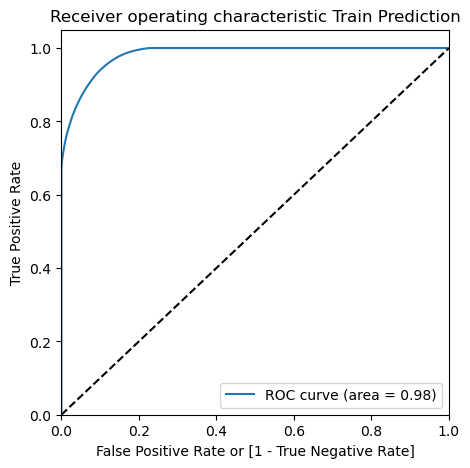

In [60]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Train Prediction')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_train_pred_final.Diabetes, y_train_pred_final.Diabetes_Prob)

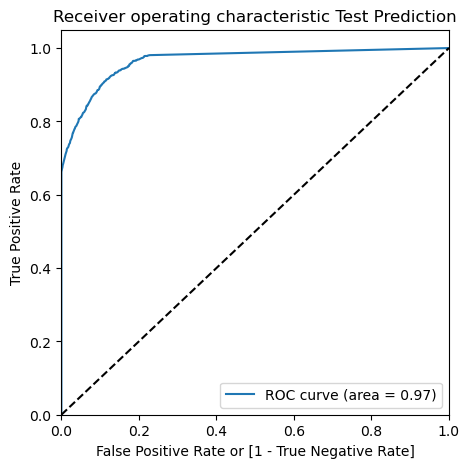

In [61]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Test Prediction')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_test_pred_final.Diabetes, y_test_pred_final.Diabetes_Prob)

In [58]:
#in model building we prefer test dataset prediction probabilities to decide optimum threshold
#on test dataset 
y_test_pred_final

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.Diabetes_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

,Patient_ID,Diabetes,Diabetes_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,42083,0,0.022472,0,1,0,0,0,0,0,0,0,0,0
1,71825,0,0.000000,0,0,0,0,0,0,0,0,0,0,0
2,99535,0,0.000000,0,0,0,0,0,0,0,0,0,0,0
3,47879,0,0.000000,0,0,0,0,0,0,0,0,0,0,0
4,36734,0,0.000000,0,0,0,0,0,0,0,0,0,0,0


     threshold  accuracy     sensi     speci
0.0        0.0   0.78992  0.980690  0.771742
0.1        0.1   0.90724  0.878161  0.910011
0.2        0.2   0.94992  0.779310  0.966177
0.3        0.3   0.96332  0.723678  0.986156
0.4        0.4   0.96840  0.684138  0.995487
0.5        0.5   0.96976  0.672644  0.998072
0.6        0.6   0.97056  0.661609  1.000000
0.7        0.7   0.97056  0.661609  1.000000
0.8        0.8   0.97056  0.661609  1.000000
0.9        0.9   0.97056  0.661609  1.000000


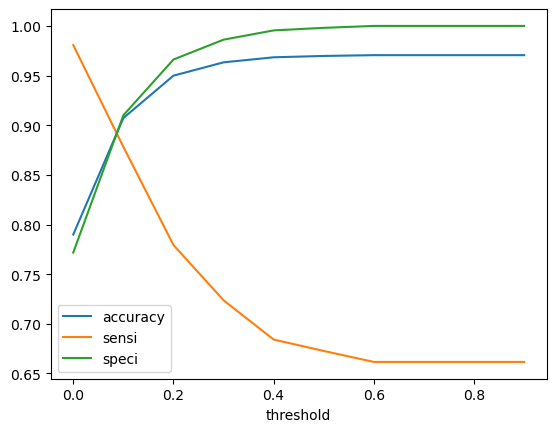

In [59]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['threshold','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final.Diabetes, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='threshold', y=['accuracy','sensi','speci'])
plt.show()

## Now Model training using Random Forest 

In [17]:
#recursive feature elimination technique
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(random_state=42)

rfe_RF=RFE(RF,n_features_to_select=4,verbose=21)

rfe_RF.fit(X_train,y_train)

names=X_train.columns.tolist()

b=rfe_RF.ranking_

#RFE: Recursive Feature Elimination is corresponding to Machine Learning Model.
#ranking is a attribute

a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])

#a.to_csv('feature_selection.csv')

RFE_selected=a['features'][a['rank']==1]

RFE_selected

Fitting estimator with 5 features.


0            HbA1c_level
1                    age
2    blood_glucose_level
3                    bmi
Name: features, dtype: object

In [18]:
X_train=X_train[RFE_selected]
X_test=X_test[RFE_selected]

In [19]:
X_test.shape,X_train.shape

((25000, 4), (75000, 4))

In [14]:
from sklearn.ensemble import RandomForestClassifier
#Building a Basic RandomForestClassifier  Model

#default RandomForestClassifier  algorithm
clf_RF = RandomForestClassifier()
clf_RF.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
#Predicting on Train and Test
train_pred_RF = clf_RF.predict(X_train)
test_pred_RF = clf_RF.predict(X_test)

In [16]:
train_pred_RF

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
test_pred_RF

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
#Getting evaluation metrics and evaluating model performance

confusion_matrix_train = confusion_matrix(y_train, train_pred_RF)

print(confusion_matrix_train)

#True values vs Model predicted

[[68654    21]
 [  268  6057]]


In [19]:
confusion_matrix_test = confusion_matrix(y_test, test_pred_RF)
print(confusion_matrix_test)

[[22650   175]
 [  685  1490]]


In [20]:
#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.9996942118674919
Train TPR:  0.9576284584980237
Train Accuracy:  0.9961466666666666


In [21]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1]) #Recall

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9923329682365827
Test TPR:  0.6850574712643678
Test Accuracy:  0.9656


In [22]:
clf_RF.feature_importances_

array([0.43498238, 0.09265573, 0.31929812, 0.15306378])

In [23]:
importances_RF = clf_RF.feature_importances_

In [24]:
importances_RF

array([0.43498238, 0.09265573, 0.31929812, 0.15306378])

In [25]:
df_imp=pd.DataFrame({'features':X_train.columns,'imortances':clf_RF.feature_importances_})

df_imp=df_imp.sort_values(by='imortances',ascending=False)

df_imp

,features,imortances
0,HbA1c_level,0.434982
2,blood_glucose_level,0.319298
3,bmi,0.153064
1,age,0.092656


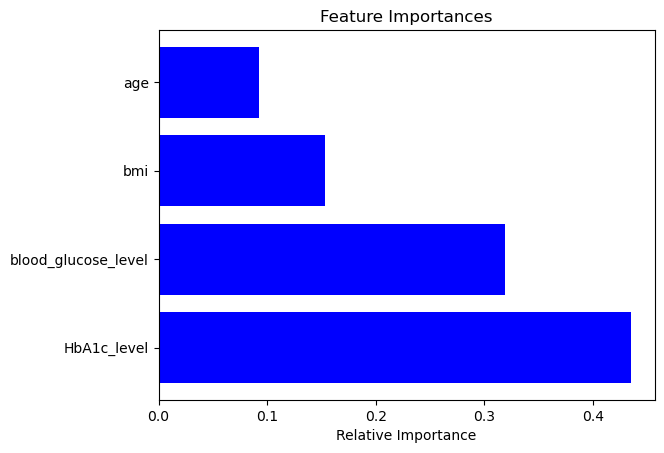

In [26]:
#Ploting the Feature importances
plt.title('Feature Importances')
plt.barh(df_imp['features'], df_imp['imortances'], color='blue')
plt.yticks(df_imp['features'])
plt.xlabel('Relative Importance')
plt.show()

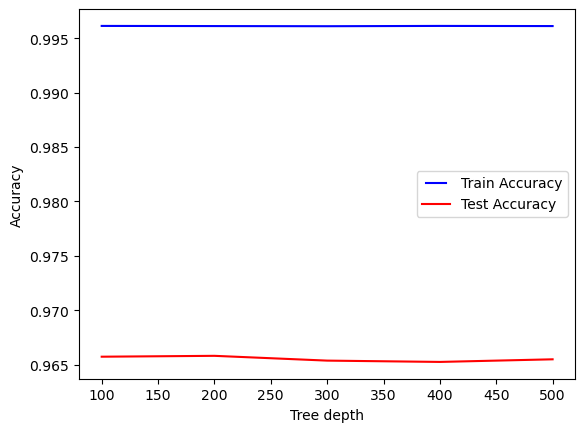

In [29]:
#How do we arrive at the best tree depth for this data?
max_depths = [100,200,300,400,500]

train_results = []
test_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth)
    rf.fit(X_train, y_train)

    train_pred_RF = rf.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred_RF)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred_RF = rf.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred_RF)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

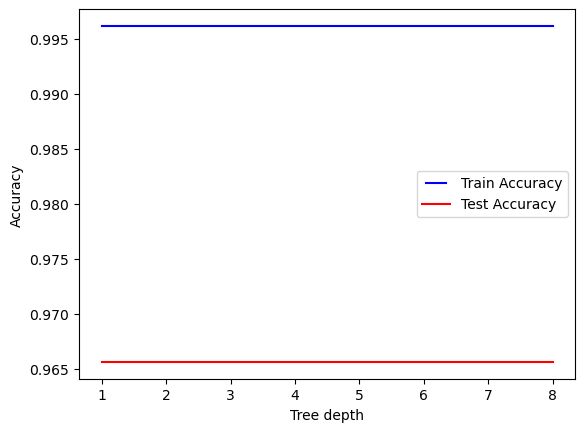

In [28]:
#How do we arrive at the best tree depth for this data?
max_depths = [1,2,4,6,8]

train_results = []
test_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth)
    rf.fit(X_train, y_train)

    train_pred_RF = rf.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred_RF)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred_RF = rf.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred_RF)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

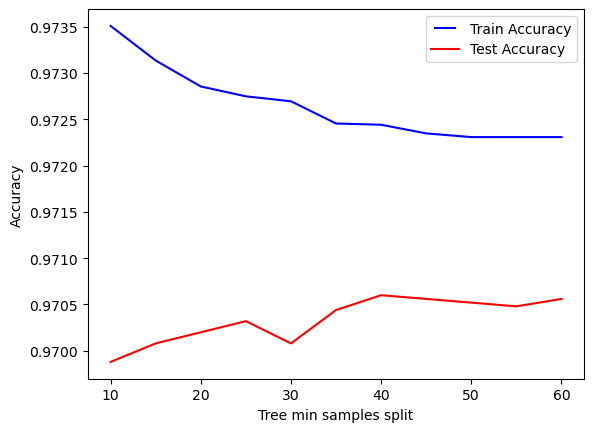

In [32]:
#How do we arrive at the best tree min_samples_leaf for this data?
#min_samples_leaf = np.linspace(2, 31, 30, endpoint=True)

min_samples_leafs=[10,15,20,25,30,35,40,45,50,55,60]

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(X_train, y_train)

    train_pred = rf.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = rf.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min samples split')
plt.show()

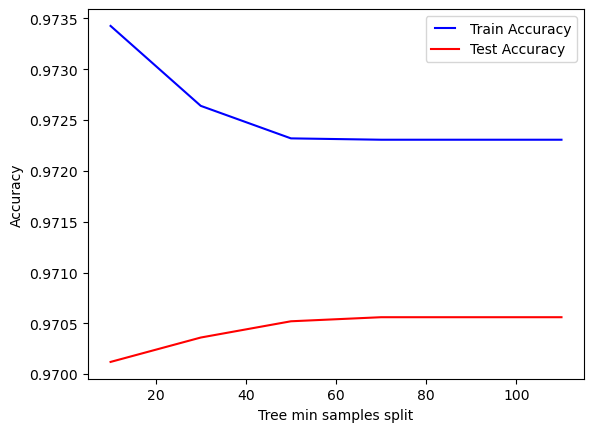

In [33]:
#How do we arrive at the best tree min_samples_leaf for this data?
#min_samples_leaf = np.linspace(2, 31, 30, endpoint=True)

min_samples_leafs=[10,30,50,70,90,110]

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(X_train, y_train)

    train_pred = rf.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = rf.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min samples split')
plt.show()

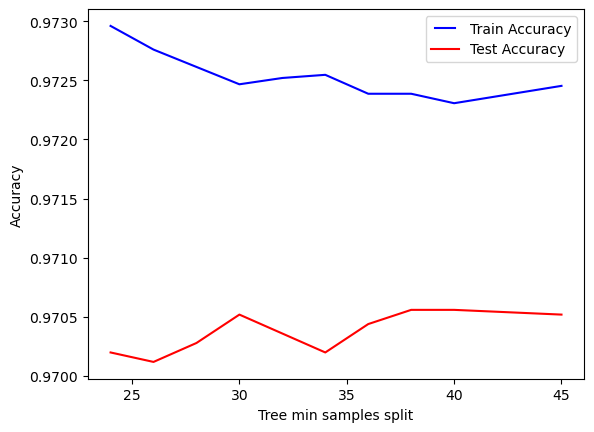

In [34]:
#How do we arrive at the best tree min_samples_leaf for this data?
#min_samples_leaf = np.linspace(2, 31, 30, endpoint=True)

min_samples_leafs=[24,26,28,30,32,34,36,38,40,45]

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(X_train, y_train)

    train_pred = rf.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = rf.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min samples split')
plt.show()

In [20]:

 
# Use a grid over parameters of interest
param_grid = {"n_estimators" : [9, 18, 27, 36, 45, 54, 63],
              "max_depth" : [2,3,5,7],
              "min_samples_leaf" : [2, 4]
             }

In [21]:
#Use the GridSearchCV
rf = RandomForestClassifier(n_jobs=-1, max_features='sqrt')  #estimator
clf2_RF = GridSearchCV(estimator=rf, param_grid=param_grid,cv=3)
clf2_RF.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [2, 3, 5, 7], 'min_samples_leaf': [2, 4],
                         'n_estimators': [9, 18, 27, 36, 45, 54, 63]})

In [22]:
clf2_RF

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [2, 3, 5, 7], 'min_samples_leaf': [2, 4],
                         'n_estimators': [9, 18, 27, 36, 45, 54, 63]})

In [23]:
clf2_RF.best_estimator_

RandomForestClassifier(max_depth=2, min_samples_leaf=2, n_estimators=18,
                       n_jobs=-1)

In [40]:
clf2_RF.cv_results_

{'mean_fit_time': array([0.37456973, 0.49543063, 0.80555836, 1.3078359 , 1.42066876,
        1.50369382, 1.58551176, 0.30786824, 0.48489229, 0.67562532,
        0.8674585 , 1.20056097, 1.57171941, 2.21848321, 0.64729643,
        0.63416219, 0.88904349, 1.0037241 , 1.22939094, 1.46209049,
        1.69861706, 0.33471227, 0.55137992, 0.7870791 , 1.00152294,
        1.2332236 , 1.45938595, 1.66995247, 0.43228054, 0.72089767,
        0.99026299, 1.28801664, 1.58378418, 1.87525241, 2.1606276 ,
        0.40874394, 0.69761205, 1.00121268, 1.29154102, 1.58493932,
        1.88853971, 2.17209339, 0.45224873, 0.83878771, 1.16490046,
        1.53753575, 1.88414939, 2.23862791, 2.67170636, 0.46020706,
        0.9815859 , 1.3270487 , 1.58498128, 1.87363998, 2.22492321,
        2.72856092]),
 'std_fit_time': array([0.11386701, 0.00569697, 0.07243468, 0.12909152, 0.15224668,
        0.06653398, 0.07427342, 0.01212646, 0.00306722, 0.01291837,
        0.01515142, 0.20548835, 0.38034538, 0.20833707, 0.021

In [24]:
#Predicting on Train and Test
train_pred = clf2_RF.predict(X_train)
test_pred = clf2_RF.predict(X_test)

In [25]:
#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Train TNR:  1.0
Train TPR:  0.6716205533596838
Train Accuracy:  0.9723066666666667
Test TNR:  1.0
Test TPR:  0.6616091954022989
Test Accuracy:  0.97056


In [26]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
TP = confusion_matrix_train[1,1] # true positive 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives
rfc_result_train={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}

    

In [27]:
rfc_result_train

{'accuracy': 0.972,
 'recall': 0.672,
 'precision': 1.0,
 'FPR': 0.0,
 'specificity': 1.0}

In [28]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
TP = confusion_matrix_test[1,1] # true positive 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives
rfc_result_test={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}

    

In [29]:
rfc_result_test

{'accuracy': 0.971,
 'recall': 0.662,
 'precision': 1.0,
 'FPR': 0.0,
 'specificity': 1.0}

In [140]:
import plotly.graph_objects as go
# Plotting
metrics = list(rfc_result_train.keys())
values_train = list(rfc_result_train.values())
values_test = list(rfc_result_test.values())

fig = go.Figure()
fig.add_trace(go.Bar(x=metrics, y=values_train,marker_color='#1f77b4', name='Training Result'))
fig.add_trace(go.Bar(x=metrics, y=values_test,marker_color='#7f7f7f', name='Test Result'))

fig.update_layout(
    title=' RandomForestClassifier Model Performance',
    xaxis_title='Evaluation metrics',
    yaxis_title='Model Performance',
    barmode='group'
)

fig.show()

In [41]:
def get_predictions(X_train,y_train):
    y_train_pred_final_RF = pd.DataFrame({'Diabetes':y_train.values, 'Diabetes_Prob':clf2_RF.predict_proba(X_train)[:,1]})
    y_train_pred_final_RF['Patient_ID'] = y_train.index
    y_train_pred_final_RF = y_train_pred_final_RF.reindex(['Patient_ID','Diabetes','Diabetes_Prob'], axis=1)
    y_train_pred_final_RF['predicted'] = y_train_pred_final_RF.Diabetes_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final_RF
    
y_train_pred_final_RF=get_predictions(X_train,y_train)    
# Let's see the head
y_train_pred_final_RF

,Patient_ID,Diabetes,Diabetes_Prob,predicted
0,31450,0,0.036391,0
1,42809,0,0.067574,0
2,52419,0,0.067574,0
3,45663,0,0.032077,0
4,50696,0,0.072783,0
...,...,...,...,...
74995,63206,0,0.026988,0
74996,61404,0,0.072783,0
74997,17730,0,0.022674,0
74998,28030,0,0.026988,0


In [34]:
def get_predictions_on_test_data(X_test,y_test):
    y_test_pred_final_RF = pd.DataFrame({'Diabetes':y_test.values, 'Diabetes_Prob':clf2_RF.predict_proba(X_test)[:,1]})
    y_test_pred_final_RF['Patient_ID'] = y_test.index
    y_test_pred_final_RF = y_test_pred_final_RF.reindex(['Patient_ID','Diabetes','Diabetes_Prob'], axis=1)
    y_test_pred_final_RF['predicted'] = y_test_pred_final_RF.Diabetes_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_test_pred_final_RF
    
y_test_pred_final_RF=get_predictions(X_test,y_test)    
# Let's see the head
y_test_pred_final_RF.head()

,Patient_ID,Diabetes,Diabetes_Prob,predicted
0,42083,0,0.026988,0
1,71825,0,0.022674,0
2,99535,0,0.032077,0
3,47879,0,0.026988,0
4,36734,0,0.072783,0


In [35]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final_RF.Diabetes, y_train_pred_final_RF.predicted )
print(confusion)

[[68675     0]
 [ 2077  4248]]


In [36]:

def generate_model_result_proba(y_train,predicted):
    confusion = confusion_matrix(y_train, predicted )
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    result_df={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}
    
    return result_df
    
result_df_train_RF=generate_model_result_proba(y_train,y_train_pred_final_RF['predicted'])
result_df_train_RF

{'accuracy': 0.972,
 'recall': 0.672,
 'precision': 1.0,
 'FPR': 0.0,
 'specificity': 1.0}

In [37]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final_RF.Diabetes, y_test_pred_final_RF.predicted )

# Let's check the overall accuracy.
acc = metrics.accuracy_score(y_test_pred_final_RF.Diabetes, y_test_pred_final_RF.predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

recall = TP / float(TP+FN)

precision = TP / float(TP+FP)

fpr = FP/ float(TN+FP)

specificity = TN / float(TN+FP)

print('confusion_metrics\n {} \n Accuracy= {} / Recall= {} / Percision= {} / FPR= {} \n Specificity= {}'.format(confusion,acc, recall,precision,fpr,specificity))


confusion_metrics
 [[22825     0]
 [  736  1439]] 
 Accuracy= 0.97056 / Recall= 0.6616091954022989 / Percision= 1.0 / FPR= 0.0 
 Specificity= 1.0


## ROC Curve

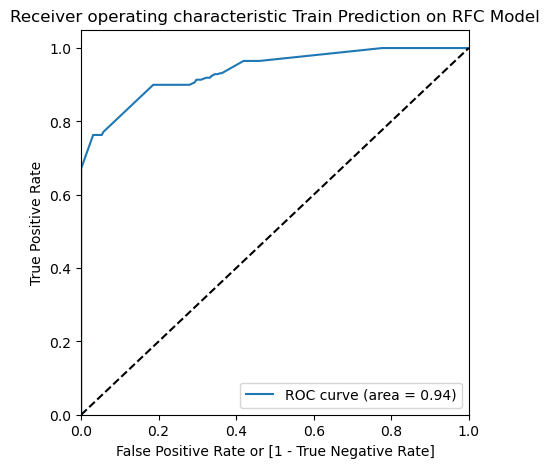

In [38]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Train Prediction on RFC Model')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_train_pred_final_RF.Diabetes, y_train_pred_final_RF.Diabetes_Prob)

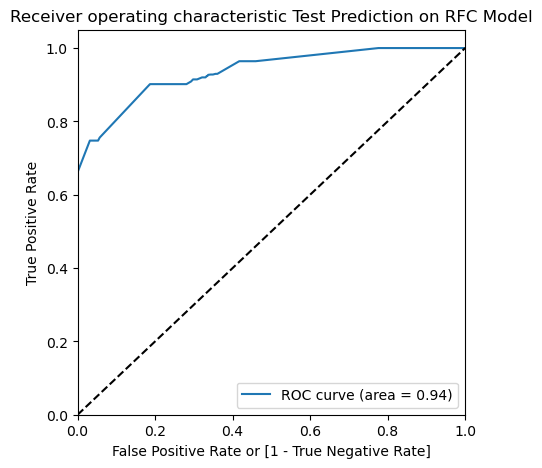

In [39]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Test Prediction on RFC Model')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_test_pred_final_RF.Diabetes, y_test_pred_final_RF.Diabetes_Prob)

In [42]:
#in model building we prefer test dataset prediction probabilities to decide optimum threshold
#on test dataset 
y_test_pred_final_RF

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final_RF[i]= y_test_pred_final_RF.Diabetes_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final_RF.head()

,Patient_ID,Diabetes,Diabetes_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,42083,0,0.026988,0,1,0,0,0,0,0,0,0,0,0
1,71825,0,0.022674,0,1,0,0,0,0,0,0,0,0,0
2,99535,0,0.032077,0,1,0,0,0,0,0,0,0,0,0
3,47879,0,0.026988,0,1,0,0,0,0,0,0,0,0,0
4,36734,0,0.072783,0,1,0,0,0,0,0,0,0,0,0


     threshold  accuracy  sensitivity  specificity
0.0        0.0   0.08700     1.000000          0.0
0.1        0.1   0.97056     0.661609          1.0
0.2        0.2   0.97056     0.661609          1.0
0.3        0.3   0.97056     0.661609          1.0
0.4        0.4   0.97056     0.661609          1.0
0.5        0.5   0.97056     0.661609          1.0
0.6        0.6   0.97056     0.661609          1.0
0.7        0.7   0.94944     0.418851          1.0
0.8        0.8   0.92804     0.172874          1.0
0.9        0.9   0.92804     0.172874          1.0


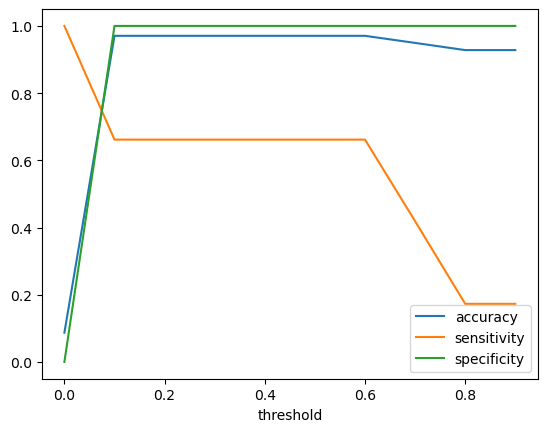

In [44]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['threshold','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final_RF.Diabetes, y_test_pred_final_RF[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='threshold', y=['accuracy','sensitivity','specificity'])
plt.show()

# Now using Gradient boosting 

In [52]:

#default RandomForestClassifier  algorithm
clf_GB = GradientBoostingClassifier()
clf_GB.fit(X_train, y_train)

GradientBoostingClassifier()

In [53]:
#Predicting on Train and Test
train_pred_GB = clf_GB.predict(X_train)
test_pred_GB = clf_GB.predict(X_test)

In [54]:
#Getting evaluation metrics and evaluating model performance

confusion_matrix_train = confusion_matrix(y_train, train_pred_GB)

print(confusion_matrix_train)

#True values vs Model predicted

[[68665    10]
 [ 2051  4274]]


In [55]:
confusion_matrix_test = confusion_matrix(y_test, test_pred_GB)
print(confusion_matrix_test)

[[22819     6]
 [  728  1447]]


In [56]:
#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.9998543866035675
Train TPR:  0.6757312252964427
Train Accuracy:  0.97252


In [57]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1]) #Recall

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9997371303395399
Test TPR:  0.6652873563218391
Test Accuracy:  0.97064


In [119]:
GBM_model = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8)
GBM_model.fit(X=X_train, y=y_train)
# %time GBM_model.fit(X=X_train, y=y_train)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=50, subsample=0.8)

In [120]:
# Model Evaluation
y_pred_train = GBM_model.predict(X_train)
y_pred_test = GBM_model.predict(X_test)

In [121]:
# Feature Importance
importances = GBM_model.feature_importances_
indices1 = np.argsort(importances)[::-1]
print(indices1)
pd.DataFrame([X_train.columns[indices1],np.sort(importances)[::-1]])

[ 4  5  0  3  1  2  9  7 10 12  6 13 11 14  8]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,HbA1c_level,blood_glucose_level,age,bmi,hypertension,heart_disease,smoking_history_No Info,gender_Male,smoking_history_current,smoking_history_former,gender_Female,smoking_history_never,smoking_history_ever,smoking_history_not current,gender_Other
1,0.620698,0.311546,0.036312,0.020175,0.005179,0.003606,0.001145,0.000454,0.000253,0.000228,0.000136,0.00011,0.000096,0.000063,0.0


In [123]:
from sklearn import metrics

In [124]:
print("Accuracy for Train set:")
print(metrics.accuracy_score(y_train,y_pred_train))

print("Accuracy for Test set:")
print(metrics.accuracy_score(y_test,y_pred_test))

Accuracy for Train set:
0.9732933333333333
Accuracy for Test set:
0.97072


In [125]:
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
TP = confusion_matrix_train[1,1] # true positive 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives
result_df={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}
result_df
    

{'accuracy': 0.973,
 'recall': 0.696,
 'precision': 0.982,
 'FPR': 0.001,
 'specificity': 0.999}

In [126]:
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
TP = confusion_matrix_test[1,1] # true positive 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives
result_df={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}
result_df
    

{'accuracy': 0.971,
 'recall': 0.68,
 'precision': 0.976,
 'FPR': 0.002,
 'specificity': 0.998}

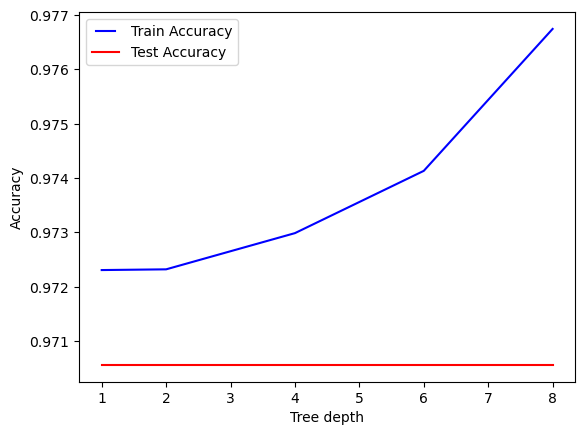

In [71]:
#How do we arrive at the best tree depth for this data?
max_depths = [1,2,4,6,8]

train_results = []
test_results = []

for max_depth in max_depths:
    gb = GradientBoostingClassifier(max_depth=max_depth)
    gb.fit(X_train, y_train)

    train_pred = gb.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred_RF = gb.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

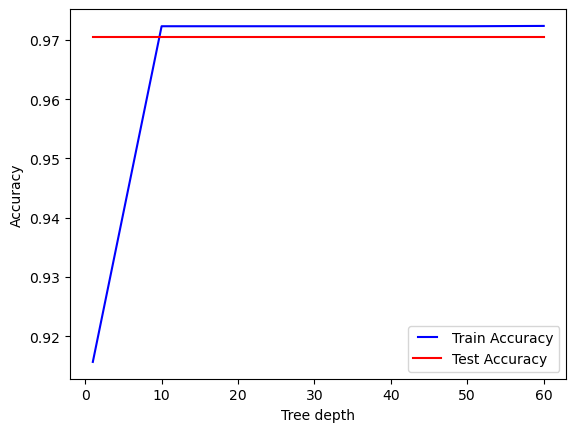

In [72]:
#How do we arrive at the best n_estimators  for this data?
n_estimators = [1,10,20,30,40,50,60]

train_results = []
test_results = []

for max_depth in max_depths:
    gb = GradientBoostingClassifier(n_estimators=n_estimators)
    gb.fit(X_train, y_train)

    train_pred = gb.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = gb.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

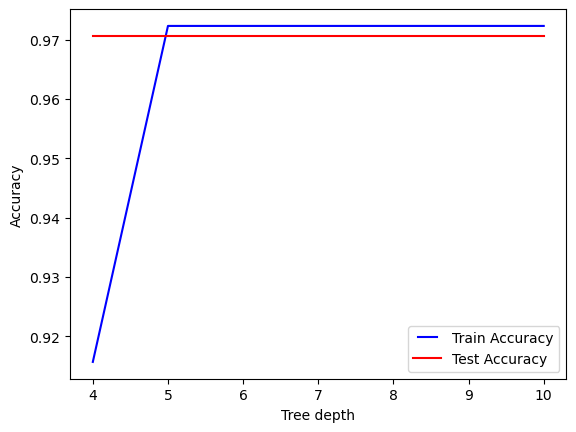

In [79]:
#How do we arrive at the best n_estimators  for this data?
n_estimators = [4,5,6,7,8,9,10]

train_results = []
test_results = []

for n_estimator in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=n_estimator)
    gb.fit(X_train, y_train)

    train_pred = gb.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = gb.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results,'b', label='Train Accuracy')
line2, = plt.plot(n_estimators, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

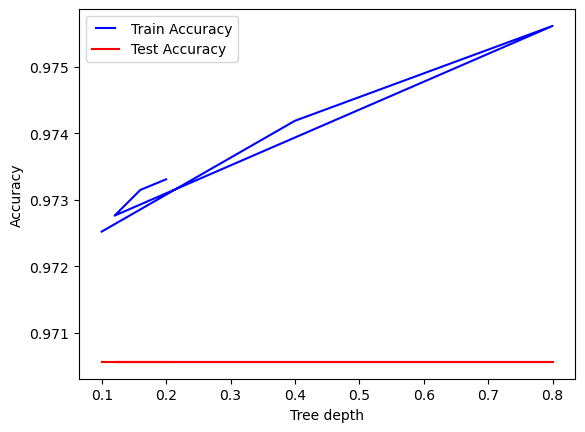

In [80]:
#How do we arrive at the best learning_rate  for this data?
learning_rates = [0.1,0.4,0.8,0.12,0.16,0.20]

train_results = []
test_results = []

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(learning_rate=learning_rate)
    gb.fit(X_train, y_train)

    train_pred = gb.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = gb.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results,'b', label='Train Accuracy')
line2, = plt.plot(learning_rates, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

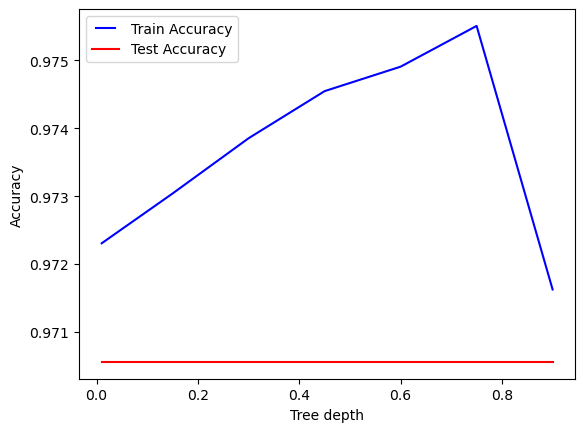

In [81]:
#How do we arrive at the best learning_rate  for this data?
learning_rates = [0.01,0.15,0.30,0.45,0.60,0.75,0.90]

train_results = []
test_results = []

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(learning_rate=learning_rate)
    gb.fit(X_train, y_train)

    train_pred = gb.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = gb.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results,'b', label='Train Accuracy')
line2, = plt.plot(learning_rates, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

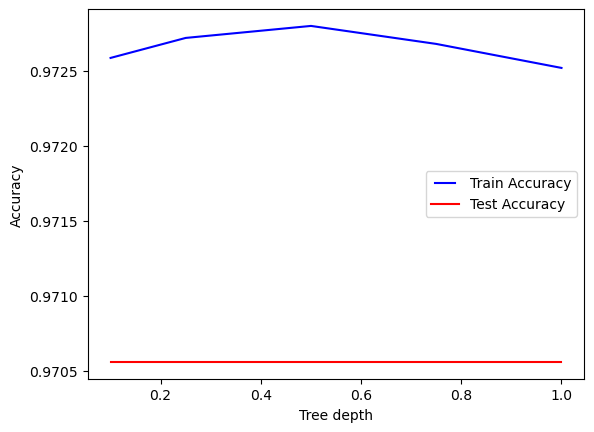

In [83]:
#How do we arrive at the best learning_rate  for this data?
subsamples = [0.10,0.25,0.50,0.75,1.0]

train_results = []
test_results = []

for subsample in subsamples:
    gb = GradientBoostingClassifier(subsample=subsample)
    gb.fit(X_train, y_train)

    train_pred = gb.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = gb.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(subsamples, train_results,'b', label='Train Accuracy')
line2, = plt.plot(subsamples, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

In [45]:

 
# Use a grid over parameters of interest
param_grid = {"n_estimators" : [5,6,7,8,9],
              "subsample" : [0.2,1.0],
              "learning_rate" : [0.1,0.9,0.10]
             }

In [46]:
#Use the GridSearchCV
gb = GradientBoostingClassifier()  #estimator
clf2_GB = GridSearchCV(estimator=gb, param_grid=param_grid,cv=3)
clf2_GB.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.9, 0.1],
                         'n_estimators': [5, 6, 7, 8, 9],
                         'subsample': [0.2, 1.0]})

In [47]:
clf2_GB.best_estimator_

GradientBoostingClassifier(learning_rate=0.9, n_estimators=8)

In [48]:
#Predicting on Train and Test
train_pred = clf2_GB.predict(X_train)
test_pred = clf2_GB.predict(X_test)

In [49]:
#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Train TNR:  0.999767018565708
Train TPR:  0.6757312252964427
Train Accuracy:  0.97244
Test TNR:  0.9997809419496166
Test TPR:  0.664367816091954
Test Accuracy:  0.9706


In [50]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
TP = confusion_matrix_train[1,1] # true positive 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives
gb_result_train={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}

    

In [51]:
gb_result_train

{'accuracy': 0.972,
 'recall': 0.676,
 'precision': 0.996,
 'FPR': 0.0,
 'specificity': 1.0}

In [52]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
TP = confusion_matrix_test[1,1] # true positive 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives
gb_result_test={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}

    

In [53]:
gb_result_test

{'accuracy': 0.971,
 'recall': 0.664,
 'precision': 0.997,
 'FPR': 0.0,
 'specificity': 1.0}

In [118]:
import plotly.graph_objects as go
# Plotting
metrics = list(xgb_result_train.keys())
values_train = list(gb_result_train.values())
values_test = list(gb_result_test.values())

fig = go.Figure()
fig.add_trace(go.Bar(x=metrics, y=values_train,marker_color='#17becf', name='Training Result'))
fig.add_trace(go.Bar(x=metrics, y=values_test,marker_color='#e377c2', name='Test Result'))

fig.update_layout(
    title=' GradientBoostingClassifier Model Performance',
    xaxis_title='Evaluation metrics',
    yaxis_title='Model Performance',
    barmode='group'
)

fig.show()

In [54]:
def get_predictions(X_train,y_train):
    y_train_pred_final_GB = pd.DataFrame({'Diabetes':y_train.values, 'Diabetes_Prob':clf2_GB.predict_proba(X_train)[:,1]})
    y_train_pred_final_GB['Patient_ID'] = y_train.index
    y_train_pred_final_GB = y_train_pred_final_GB.reindex(['Patient_ID','Diabetes','Diabetes_Prob'], axis=1)
    y_train_pred_final_GB['predicted'] = y_train_pred_final_GB.Diabetes_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final_GB
    
y_train_pred_final_GB=get_predictions(X_train,y_train)    
# Let's see the head
y_train_pred_final_GB

,Patient_ID,Diabetes,Diabetes_Prob,predicted
0,31450,0,0.001899,0
1,42809,0,0.001250,0
2,52419,0,0.001509,0
3,45663,0,0.001945,0
4,50696,0,0.000906,0
...,...,...,...,...
74995,63206,0,0.001949,0
74996,61404,0,0.001274,0
74997,17730,0,0.000607,0
74998,28030,0,0.004909,0


In [55]:
def get_predictions_on_test_data(X_test,y_test):
    y_test_pred_final_GB = pd.DataFrame({'Diabetes':y_test.values, 'Diabetes_Prob':clf2_GB.predict_proba(X_test)[:,1]})
    y_test_pred_final_GB['Patient_ID'] = y_test.index
    y_test_pred_final_GB = y_test_pred_final_GB.reindex(['Patient_ID','Diabetes','Diabetes_Prob'], axis=1)
    y_test_pred_final_GB['predicted'] = y_test_pred_final_GB.Diabetes_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_test_pred_final_GB
    
y_test_pred_final_GB=get_predictions(X_test,y_test)    
# Let's see the head
y_test_pred_final_GB.head()

,Patient_ID,Diabetes,Diabetes_Prob,predicted
0,42083,0,0.004909,0
1,71825,0,0.000487,0
2,99535,0,0.000349,0
3,47879,0,0.004909,0
4,36734,0,0.001274,0


In [56]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final_GB.Diabetes, y_train_pred_final_GB.predicted )
print(confusion)

[[68659    16]
 [ 2051  4274]]


In [57]:

def generate_model_result_proba(y_train,predicted):
    confusion = confusion_matrix(y_train, predicted )
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    result_df={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}
    
    return result_df
    
result_df_train_GB=generate_model_result_proba(y_train,y_train_pred_final_GB['predicted'])
result_df_train_GB

{'accuracy': 0.972,
 'recall': 0.676,
 'precision': 0.996,
 'FPR': 0.0,
 'specificity': 1.0}

In [58]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final_GB.Diabetes, y_test_pred_final_GB.predicted )

# Let's check the overall accuracy.
acc = metrics.accuracy_score(y_test_pred_final_GB.Diabetes, y_test_pred_final_GB.predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

recall = TP / float(TP+FN)

precision = TP / float(TP+FP)

fpr = FP/ float(TN+FP)

specificity = TN / float(TN+FP)

print('confusion_metrics\n {} \n Accuracy= {} / Recall= {} / Percision= {} / FPR= {} \n Specificity= {}'.format(confusion,acc, recall,precision,fpr,specificity))


confusion_metrics
 [[22820     5]
 [  730  1445]] 
 Accuracy= 0.9706 / Recall= 0.664367816091954 / Percision= 0.996551724137931 / FPR= 0.0002190580503833516 
 Specificity= 0.9997809419496166


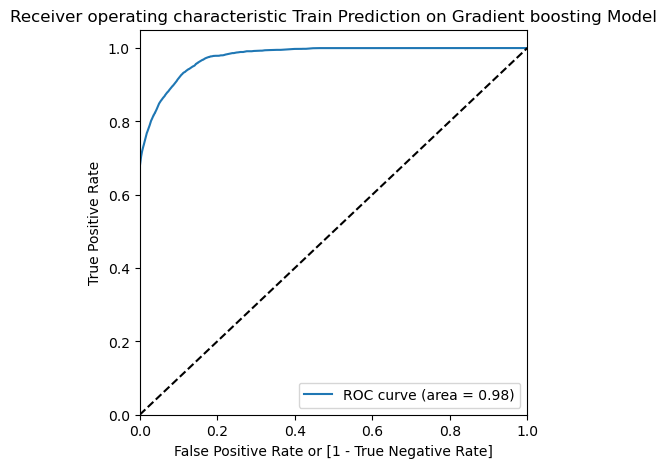

In [61]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Train Prediction on Gradient boosting Model')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_train_pred_final_GB.Diabetes, y_train_pred_final_GB.Diabetes_Prob)

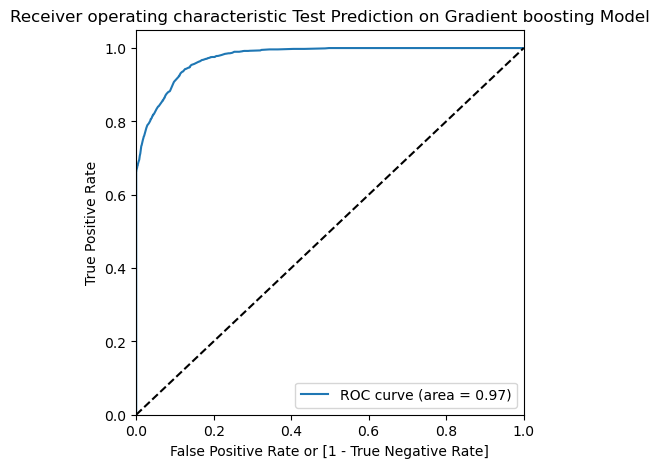

In [62]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Test Prediction on Gradient boosting Model')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_test_pred_final_GB.Diabetes, y_test_pred_final_GB.Diabetes_Prob)

In [63]:
#in model building we prefer test dataset prediction probabilities to decide optimum threshold
#on test dataset 
y_test_pred_final_GB

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final_GB[i]= y_test_pred_final_GB.Diabetes_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final_GB.head()

,Patient_ID,Diabetes,Diabetes_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,42083,0,0.004909,0,1,0,0,0,0,0,0,0,0,0
1,71825,0,0.000487,0,1,0,0,0,0,0,0,0,0,0
2,99535,0,0.000349,0,1,0,0,0,0,0,0,0,0,0
3,47879,0,0.004909,0,1,0,0,0,0,0,0,0,0,0
4,36734,0,0.001274,0,1,0,0,0,0,0,0,0,0,0


     threshold  accuracy  sensitivity  specificity
0.0        0.0   0.08700     1.000000     0.000000
0.1        0.1   0.91060     0.882299     0.913297
0.2        0.2   0.95712     0.782069     0.973801
0.3        0.3   0.96592     0.705747     0.990712
0.4        0.4   0.96920     0.680460     0.996714
0.5        0.5   0.97060     0.664368     0.999781
0.6        0.6   0.97076     0.664368     0.999956
0.7        0.7   0.97076     0.664368     0.999956
0.8        0.8   0.97056     0.661609     1.000000
0.9        0.9   0.97056     0.661609     1.000000


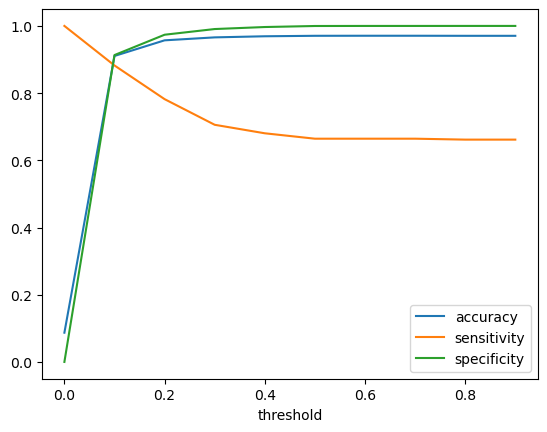

In [65]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['threshold','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final_GB.Diabetes, y_test_pred_final_GB[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='threshold', y=['accuracy','sensitivity','specificity'])
plt.show()

# Now using XGBClassifier

In [13]:

#default RandomForestClassifier  algorithm
clf_XGB = XGBClassifier()
clf_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [14]:
#Predicting on Train and Test
train_pred_XGB = clf_XGB.predict(X_train)
test_pred_XGB = clf_XGB.predict(X_test)

In [15]:
#Getting evaluation metrics and evaluating model performance

confusion_matrix_train = confusion_matrix(y_train, train_pred_XGB)

print(confusion_matrix_train)

#True values vs Model predicted

[[68637    38]
 [ 1698  4627]]


In [16]:
confusion_matrix_test = confusion_matrix(y_test, test_pred_XGB)
print(confusion_matrix_test)

[[22759    66]
 [  692  1483]]


In [17]:
#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.9994466690935566
Train TPR:  0.7315415019762845
Train Accuracy:  0.9768533333333334


In [18]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1]) #Recall

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9971084337349397
Test TPR:  0.6818390804597702
Test Accuracy:  0.96968


In [ ]:
XGB_model = XGBClassifier(n_estimators=500, 
                          gamma=0.5,
                          learning_rate=0.1)
XGB_model.fit(X_train[col], y_train)

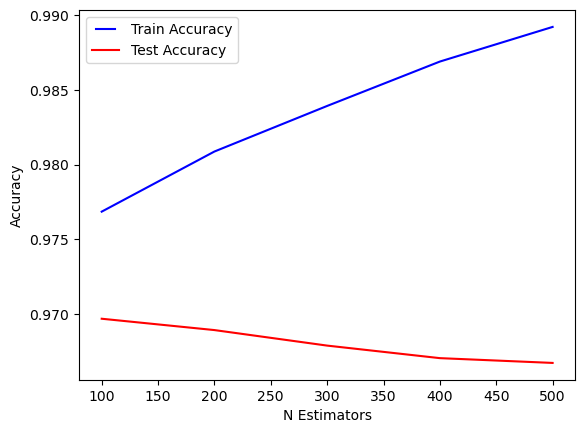

In [21]:
#How do we arrive at the best n_estimators  for this data?
n_estimators = [100,200,300,400,500]

train_results = []
test_results = []

for n_estimator in n_estimators:
    xgb = XGBClassifier(n_estimators=n_estimator)
    xgb.fit(X_train, y_train)

    train_pred = xgb.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = xgb.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results,'b', label='Train Accuracy')
line2, = plt.plot(n_estimators, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('N Estimators')
plt.show()

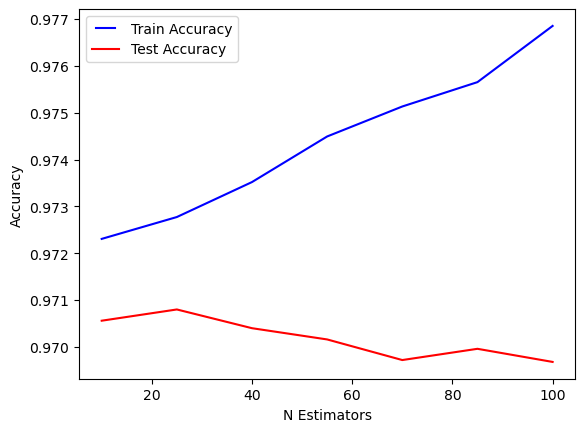

In [22]:
#How do we arrive at the best n_estimators  for this data?
n_estimators = [10,25,40,55,70,85,100]

train_results = []
test_results = []

for n_estimator in n_estimators:
    xgb = XGBClassifier(n_estimators=n_estimator)
    xgb.fit(X_train, y_train)

    train_pred = xgb.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = xgb.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results,'b', label='Train Accuracy')
line2, = plt.plot(n_estimators, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('N Estimators')
plt.show()

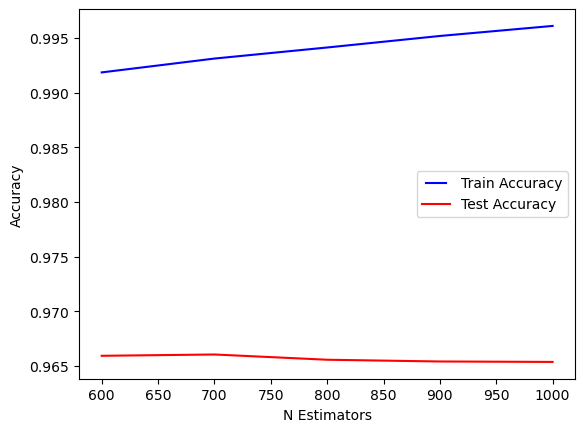

In [23]:
#How do we arrive at the best n_estimators  for this data?
n_estimators = [600,700,800,900,1000]

train_results = []
test_results = []

for n_estimator in n_estimators:
    xgb = XGBClassifier(n_estimators=n_estimator)
    xgb.fit(X_train, y_train)

    train_pred = xgb.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = xgb.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results,'b', label='Train Accuracy')
line2, = plt.plot(n_estimators, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('N Estimators')
plt.show()

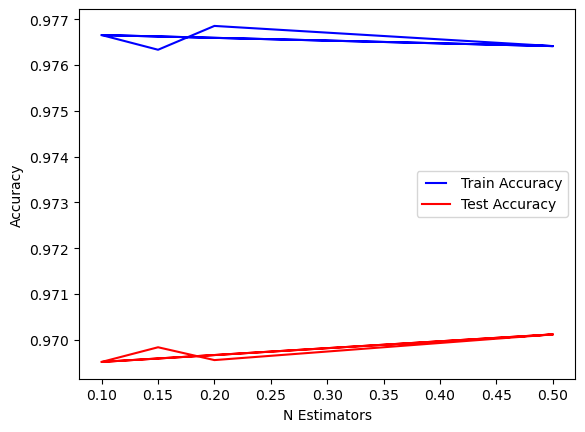

In [24]:
#How do we arrive at the best gamma  for this data?
gammas = [0.1,0.5,0.10,0.15,0.20,0.50]

train_results = []
test_results = []

for gamma in gammas:
    xgb = XGBClassifier(gamma=gamma)
    xgb.fit(X_train, y_train)

    train_pred = xgb.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = xgb.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(gammas, train_results,'b', label='Train Accuracy')
line2, = plt.plot(gammas, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('N Estimators')
plt.show()

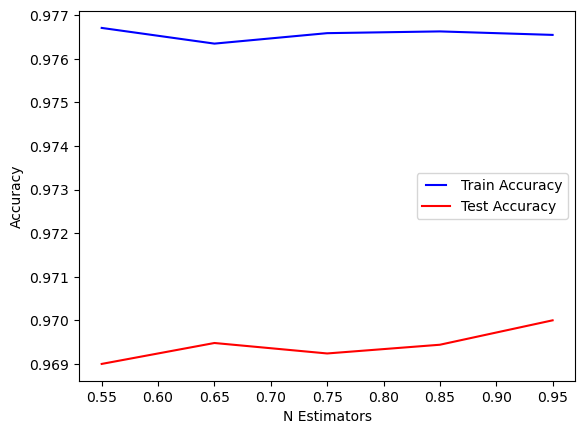

In [25]:
#How do we arrive at the best gamma  for this data?
gammas = [0.55,0.65,0.75,0.85,0.95]

train_results = []
test_results = []

for gamma in gammas:
    xgb = XGBClassifier(gamma=gamma)
    xgb.fit(X_train, y_train)

    train_pred = xgb.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = xgb.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(gammas, train_results,'b', label='Train Accuracy')
line2, = plt.plot(gammas, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('N Estimators')
plt.show()

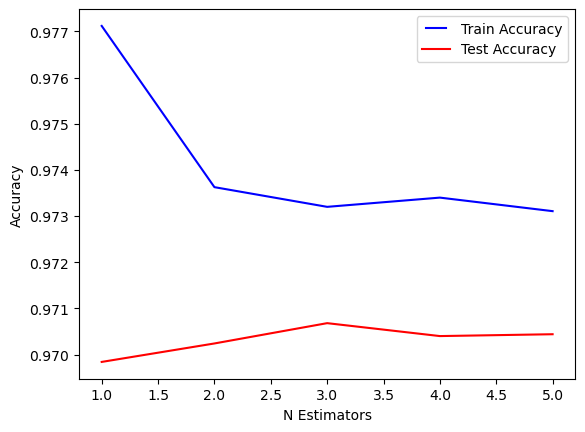

In [26]:
#How do we arrive at the best gamma  for this data?
gammas = [1.0,2.0,3.0,4.0,5.0]

train_results = []
test_results = []

for gamma in gammas:
    xgb = XGBClassifier(gamma=gamma)
    xgb.fit(X_train, y_train)

    train_pred = xgb.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = xgb.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(gammas, train_results,'b', label='Train Accuracy')
line2, = plt.plot(gammas, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('N Estimators')
plt.show()

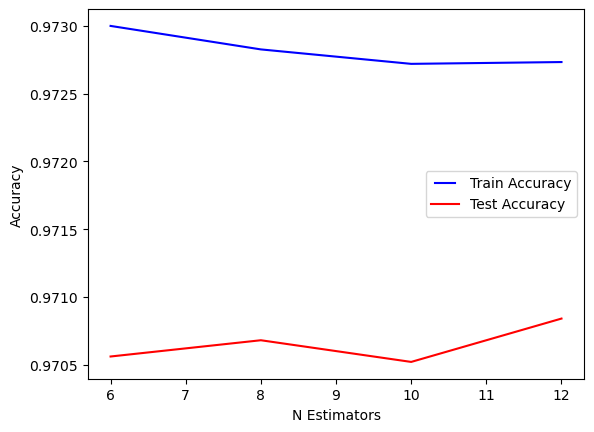

In [27]:
#How do we arrive at the best gamma  for this data?
gammas = [6.0,8.0,10.0,12.0]

train_results = []
test_results = []

for gamma in gammas:
    xgb = XGBClassifier(gamma=gamma)
    xgb.fit(X_train, y_train)

    train_pred = xgb.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = xgb.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(gammas, train_results,'b', label='Train Accuracy')
line2, = plt.plot(gammas, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('N Estimators')
plt.show()

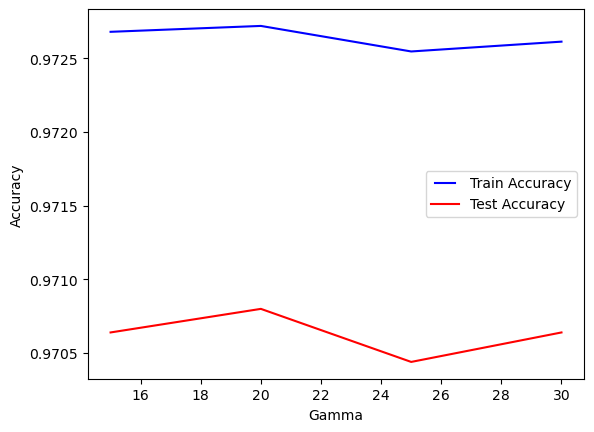

In [28]:
#How do we arrive at the best gamma  for this data?
gammas = [15,20,25,30]

train_results = []
test_results = []

for gamma in gammas:
    xgb = XGBClassifier(gamma=gamma)
    xgb.fit(X_train, y_train)

    train_pred = xgb.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = xgb.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(gammas, train_results,'b', label='Train Accuracy')
line2, = plt.plot(gammas, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Gamma')
plt.show()

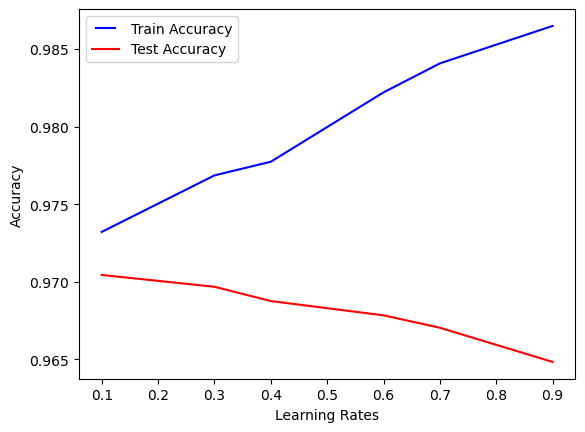

In [29]:
#How do we arrive at the best learning_rate  for this data?
learning_rates = [0.1,0.3,0.4,0.6,0.7,0.9]

train_results = []
test_results = []

for learning_rate in learning_rates:
    xgb = XGBClassifier(learning_rate=learning_rate)
    xgb.fit(X_train, y_train)

    train_pred = xgb.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = xgb.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results,'b', label='Train Accuracy')
line2, = plt.plot(learning_rates, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Learning Rates')
plt.show()

In [66]:

 
# Use a grid over parameters of interest
param_grid = {"n_estimators" : [5,10,20,30],
              "gamma" : [2,2.5,3],
              "learning_rate" : [0.1,0.9,0.10]
             }

In [67]:
#Use the GridSearchCV
xgb = XGBClassifier()  #estimator
clf2_XGB = GridSearchCV(estimator=xgb, param_grid=param_grid,cv=3)
clf2_XGB.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [2, 2.5, 3], 'learning_rate': [0.1, 0.9, 0.1],
                         'n_estimators': [5, 10, 20, 30]})

In [68]:
clf2_XGB.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [69]:
#Predicting on Train and Test
train_pred = clf2_XGB.predict(X_train)
test_pred = clf2_XGB.predict(X_test)

In [70]:
#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Train TNR:  1.0
Train TPR:  0.6716205533596838
Train Accuracy:  0.9723066666666667
Test TNR:  1.0
Test TPR:  0.6616091954022989
Test Accuracy:  0.97056


In [71]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
TP = confusion_matrix_train[1,1] # true positive 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives
xgb_result_train={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}

xgb_result_train

{'accuracy': 0.972,
 'recall': 0.672,
 'precision': 1.0,
 'FPR': 0.0,
 'specificity': 1.0}

In [72]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
TP = confusion_matrix_test[1,1] # true positive 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives
xgb_result_test={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}

xgb_result_test

{'accuracy': 0.971,
 'recall': 0.662,
 'precision': 1.0,
 'FPR': 0.0,
 'specificity': 1.0}

In [107]:
import plotly.graph_objects as go
# Plotting
metrics = list(xgb_result_train.keys())
values_train = list(xgb_result_train.values())
values_test = list(xgb_result_test.values())

fig = go.Figure()
fig.add_trace(go.Bar(x=metrics, y=values_train,marker_color='#1f77b4', name='Training Result'))
fig.add_trace(go.Bar(x=metrics, y=values_test,marker_color='#ff7f0e', name='Test Result'))

fig.update_layout(
    title=' XGBClassifier Model Performance',
    xaxis_title='Evaluation metrics',
    yaxis_title='Model Performance',
    barmode='group'
)

fig.show()

In [73]:
def get_predictions(X_train,y_train):
    y_train_pred_final_XGB = pd.DataFrame({'Diabetes':y_train.values, 'Diabetes_Prob':clf2_XGB.predict_proba(X_train)[:,1]})
    y_train_pred_final_XGB['Patient_ID'] = y_train.index
    y_train_pred_final_XGB = y_train_pred_final_XGB.reindex(['Patient_ID','Diabetes','Diabetes_Prob'], axis=1)
    y_train_pred_final_XGB['predicted'] = y_train_pred_final_XGB.Diabetes_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final_XGB
    
y_train_pred_final_XGB=get_predictions(X_train,y_train)    
# Let's see the head
y_train_pred_final_XGB

,Patient_ID,Diabetes,Diabetes_Prob,predicted
0,31450,0,0.315139,0
1,42809,0,0.298020,0
2,52419,0,0.298020,0
3,45663,0,0.298623,0
4,50696,0,0.298020,0
...,...,...,...,...
74995,63206,0,0.300033,0
74996,61404,0,0.298020,0
74997,17730,0,0.298998,0
74998,28030,0,0.300033,0


In [74]:
def get_predictions_on_test_data(X_test,y_test):
    y_test_pred_final_XGB = pd.DataFrame({'Diabetes':y_test.values, 'Diabetes_Prob':clf2_XGB.predict_proba(X_test)[:,1]})
    y_test_pred_final_XGB['Patient_ID'] = y_test.index
    y_test_pred_final_XGB = y_test_pred_final_XGB.reindex(['Patient_ID','Diabetes','Diabetes_Prob'], axis=1)
    y_test_pred_final_XGB['predicted'] = y_test_pred_final_XGB.Diabetes_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_test_pred_final_XGB
    
y_test_pred_final_XGB=get_predictions(X_test,y_test)    
# Let's see the head
y_test_pred_final_XGB.head()

,Patient_ID,Diabetes,Diabetes_Prob,predicted
0,42083,0,0.300033,0
1,71825,0,0.298998,0
2,99535,0,0.298623,0
3,47879,0,0.300033,0
4,36734,0,0.298020,0


In [75]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final_XGB.Diabetes, y_train_pred_final_XGB.predicted )
print(confusion)

[[68675     0]
 [ 2077  4248]]


In [76]:

def generate_model_result_proba(y_train,predicted):
    confusion = confusion_matrix(y_train, predicted )
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    result_df={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}
    
    return result_df
    
result_df_train_XGB=generate_model_result_proba(y_train,y_train_pred_final_XGB['predicted'])
result_df_train_XGB

{'accuracy': 0.972,
 'recall': 0.672,
 'precision': 1.0,
 'FPR': 0.0,
 'specificity': 1.0}

In [77]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final_XGB.Diabetes, y_test_pred_final_XGB.predicted )

# Let's check the overall accuracy.
acc = metrics.accuracy_score(y_test_pred_final_XGB.Diabetes, y_test_pred_final_XGB.predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

recall = TP / float(TP+FN)

precision = TP / float(TP+FP)

fpr = FP/ float(TN+FP)

specificity = TN / float(TN+FP)

print('confusion_metrics\n {} \n Accuracy= {} / Recall= {} / Percision= {} / FPR= {} \n Specificity= {}'.format(confusion,acc, recall,precision,fpr,specificity))


confusion_metrics
 [[22825     0]
 [  736  1439]] 
 Accuracy= 0.97056 / Recall= 0.6616091954022989 / Percision= 1.0 / FPR= 0.0 
 Specificity= 1.0


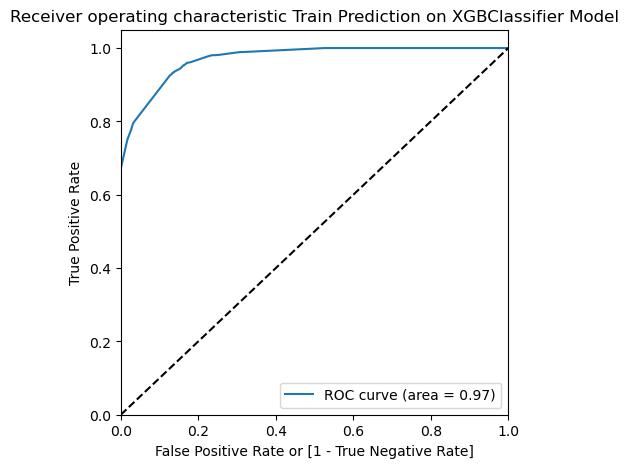

In [80]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Train Prediction on XGBClassifier Model')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_train_pred_final_XGB.Diabetes, y_train_pred_final_XGB.Diabetes_Prob)

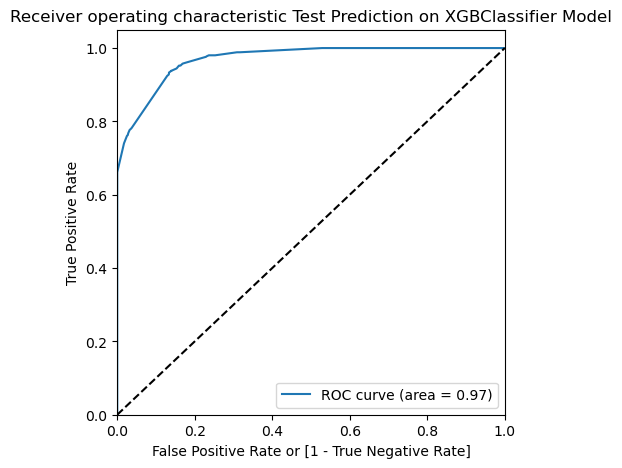

In [81]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Test Prediction on XGBClassifier Model')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_test_pred_final_XGB.Diabetes, y_test_pred_final_XGB.Diabetes_Prob)

In [82]:
#in model building we prefer test dataset prediction probabilities to decide optimum threshold
#on test dataset 
y_test_pred_final_XGB

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final_XGB[i]= y_test_pred_final_XGB.Diabetes_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final_XGB.head()

,Patient_ID,Diabetes,Diabetes_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,42083,0,0.300033,0,1,1,1,1,0,0,0,0,0,0
1,71825,0,0.298998,0,1,1,1,0,0,0,0,0,0,0
2,99535,0,0.298623,0,1,1,1,0,0,0,0,0,0,0
3,47879,0,0.300033,0,1,1,1,1,0,0,0,0,0,0
4,36734,0,0.298020,0,1,1,1,0,0,0,0,0,0,0


     threshold  accuracy  sensitivity  specificity
0.0        0.0   0.08700     1.000000     0.000000
0.1        0.1   0.08700     1.000000     0.000000
0.2        0.2   0.08700     1.000000     0.000000
0.3        0.3   0.51716     1.000000     0.471150
0.4        0.4   0.96148     0.740230     0.982563
0.5        0.5   0.97056     0.661609     1.000000
0.6        0.6   0.97056     0.661609     1.000000
0.7        0.7   0.97056     0.661609     1.000000
0.8        0.8   0.91300     0.000000     1.000000
0.9        0.9   0.91300     0.000000     1.000000


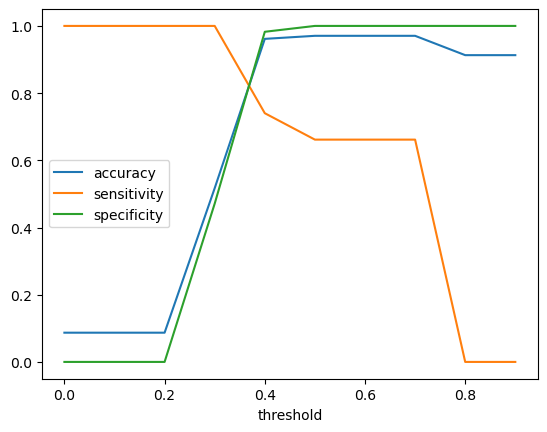

In [83]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['threshold','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final_XGB.Diabetes, y_test_pred_final_XGB[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='threshold', y=['accuracy','sensitivity','specificity'])
plt.show()

# Now using AdaBoostClassifier

In [35]:

#default RandomForestClassifier  algorithm
clf_ABC = AdaBoostClassifier()
clf_ABC.fit(X_train, y_train)

AdaBoostClassifier()

In [38]:
clf_ABC

AdaBoostClassifier()

In [39]:
#Predicting on Train and Test
train_pred_ABC = clf_ABC.predict(X_train)
test_pred_ABC = clf_ABC.predict(X_test)

In [40]:
#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred_ABC)
confusion_matrix_train = confusion_matrix(y_train, train_pred_ABC)

Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Train TNR:  0.9982963232617401
Train TPR:  0.6902766798418972
Train Accuracy:  0.97232
Test TNR:  0.9984227820372399
Test TPR:  0.6804597701149425
Test Accuracy:  0.97076


In [ ]:
Adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                                    n_estimators = 600,
                                    learning_rate = 1)

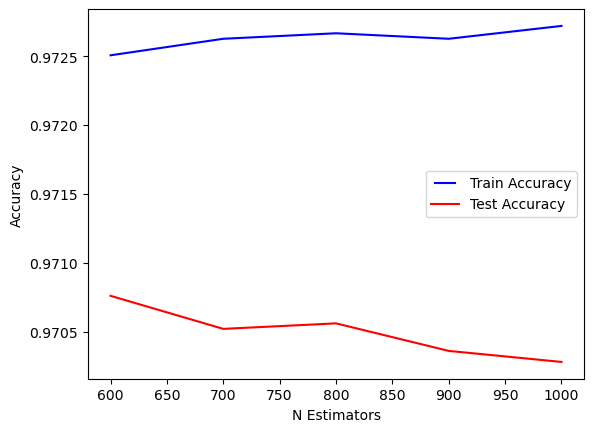

In [41]:
#How do we arrive at the best n_estimators  for this data?
n_estimators = [600,700,800,900,1000]

train_results = []
test_results = []

for n_estimator in n_estimators:
    abc = AdaBoostClassifier(n_estimators=n_estimator)
    abc.fit(X_train, y_train)

    train_pred = abc.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = abc.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results,'b', label='Train Accuracy')
line2, = plt.plot(n_estimators, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('N Estimators')
plt.show()

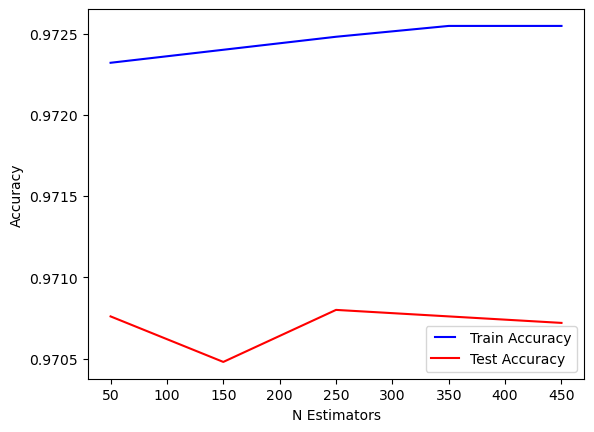

In [42]:
#How do we arrive at the best n_estimators  for this data?
n_estimators = [50,150,250,350,450]

train_results = []
test_results = []

for n_estimator in n_estimators:
    abc = AdaBoostClassifier(n_estimators=n_estimator)
    abc.fit(X_train, y_train)

    train_pred = abc.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = abc.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results,'b', label='Train Accuracy')
line2, = plt.plot(n_estimators, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('N Estimators')
plt.show()

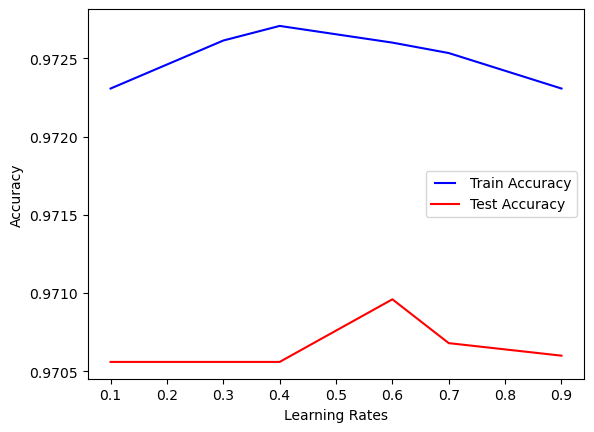

In [43]:
#How do we arrive at the best learning_rate  for this data?
learning_rates = [0.1,0.3,0.4,0.6,0.7,0.9]

train_results = []
test_results = []

for learning_rate in learning_rates:
    abc = AdaBoostClassifier(learning_rate=learning_rate)
    abc.fit(X_train, y_train)

    train_pred = abc.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = abc.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results,'b', label='Train Accuracy')
line2, = plt.plot(learning_rates, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Learning Rates')
plt.show()

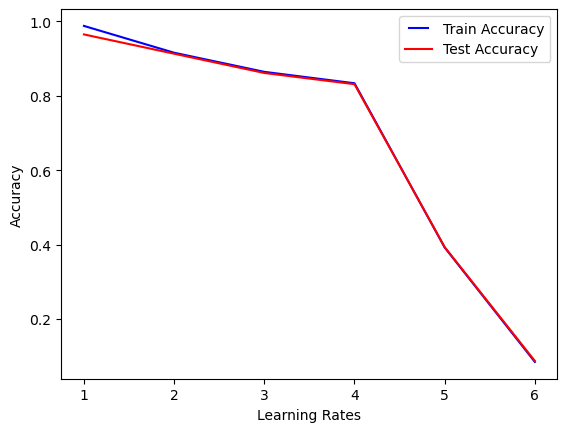

In [44]:
#How do we arrive at the best learning_rate  for this data?
learning_rates = [1,2,3,4,5,6]

train_results = []
test_results = []

for learning_rate in learning_rates:
    xgb = XGBClassifier(learning_rate=learning_rate)
    xgb.fit(X_train, y_train)

    train_pred = xgb.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = xgb.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results,'b', label='Train Accuracy')
line2, = plt.plot(learning_rates, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Learning Rates')
plt.show()

In [84]:

 
# Use a grid over parameters of interest
param_grid = {"n_estimators" : [50,250,600],
              "learning_rate" : [1.5,2.0,2.5,3.0]
             }

In [85]:
#Use the GridSearchCV
abc = AdaBoostClassifier()  #estimator
clf2_ABC = GridSearchCV(estimator=abc, param_grid=param_grid,cv=3)
clf2_ABC.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1.5, 2.0, 2.5, 3.0],
                         'n_estimators': [50, 250, 600]})

In [86]:
clf2_ABC.best_estimator_

AdaBoostClassifier(learning_rate=2.5)

In [87]:
#Predicting on Train and Test
train_pred = clf2_ABC.predict(X_train)
test_pred = clf2_ABC.predict(X_test)

In [88]:
#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Train TNR:  1.0
Train TPR:  0.6716205533596838
Train Accuracy:  0.9723066666666667
Test TNR:  1.0
Test TPR:  0.6616091954022989
Test Accuracy:  0.97056


In [89]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
TP = confusion_matrix_train[1,1] # true positive 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives
result_train={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}

result_train

{'accuracy': 0.972,
 'recall': 0.672,
 'precision': 1.0,
 'FPR': 0.0,
 'specificity': 1.0}

In [90]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
TP = confusion_matrix_test[1,1] # true positive 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives
result_test={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}

result_test

{'accuracy': 0.971,
 'recall': 0.662,
 'precision': 1.0,
 'FPR': 0.0,
 'specificity': 1.0}

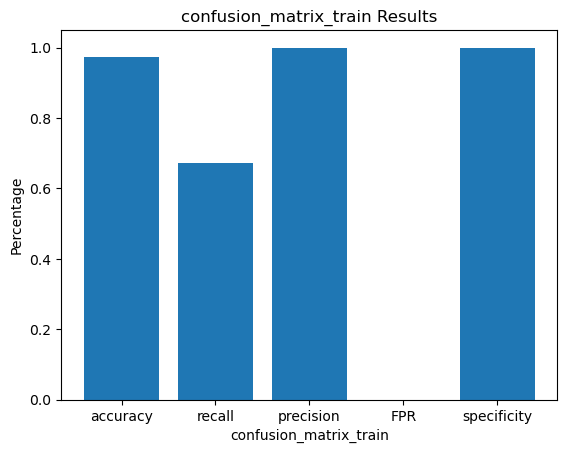

In [65]:
import matplotlib.pyplot as plt

confusion_matrix_train = confusion_matrix(y_train, train_pred)
TP = confusion_matrix_train[1,1] # true positive 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives
result_df={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}

result_df

metrics = list(result_df.keys())
values = list(result_df.values())

plt.bar(metrics, values)
plt.title('confusion_matrix_train Results')
plt.xlabel('confusion_matrix_train')
plt.ylabel('Percentage')
plt.show()


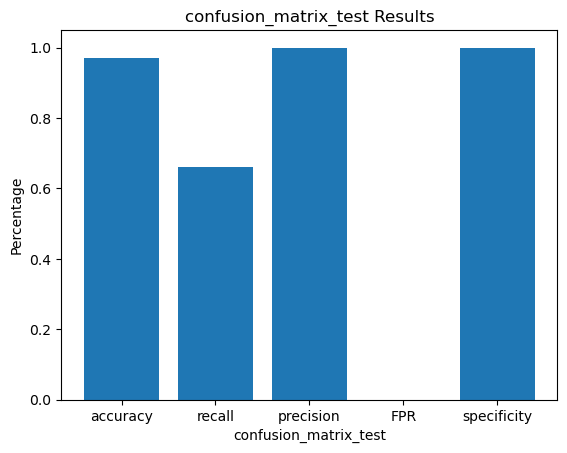

In [67]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
TP = confusion_matrix_test[1,1] # true positive 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives
result_df={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}

#Graph
metrics = list(result_df.keys())
values = list(result_df.values())

plt.bar(metrics, values)
plt.title('confusion_matrix_test Results')
plt.xlabel('confusion_matrix_test')
plt.ylabel('Percentage')
plt.show()

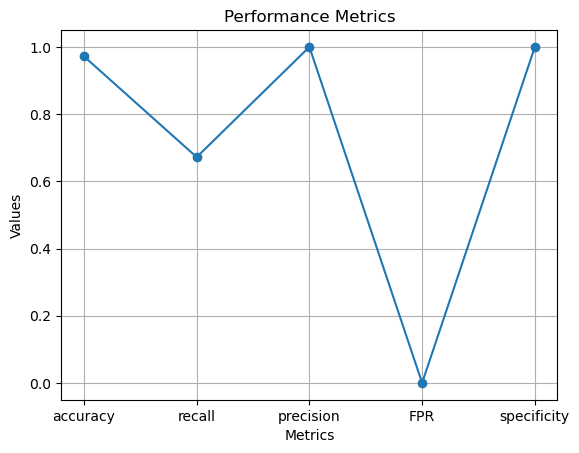

In [63]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
TP = confusion_matrix_train[1,1] # true positive 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives
result_df={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}


metrics = list(result_df.keys())
values = list(result_df.values())

plt.plot(metrics, values, marker='o')
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.grid(True)
plt.show()


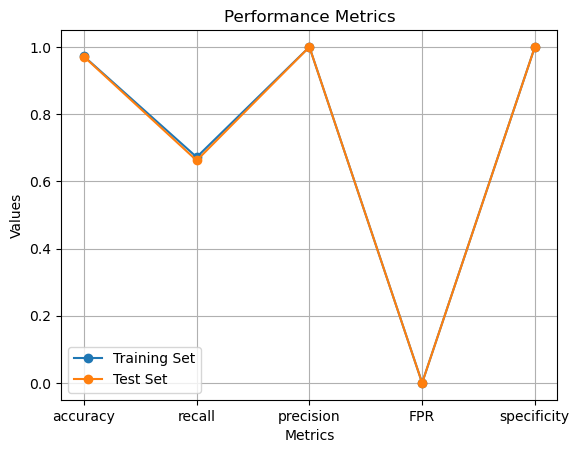

In [76]:
import matplotlib.pyplot as plt

# Training set
confusion_matrix_train = confusion_matrix(y_train, train_pred)
TP_train = confusion_matrix_train[1,1]
TN_train = confusion_matrix_train[0,0]
FP_train = confusion_matrix_train[0,1]
FN_train = confusion_matrix_train[1,0]
result_df_train = {
    'accuracy': round((TP_train + TN_train) / float(TN_train + FP_train + TP_train + FN_train), 3),
    'recall': round((TP_train) / float(TP_train + FN_train), 3),
    'precision': round((TP_train) / float(TP_train + FP_train), 3),
    'FPR': round((FP_train) / float(TN_train + FP_train), 3),
    'specificity': round((TN_train) / float(TN_train + FP_train), 3)
}

# Test set
confusion_matrix_test = confusion_matrix(y_test, test_pred)
TP_test = confusion_matrix_test[1,1]
TN_test = confusion_matrix_test[0,0]
FP_test = confusion_matrix_test[0,1]
FN_test = confusion_matrix_test[1,0]
result_df_test = {
    'accuracy': round((TP_test + TN_test) / float(TN_test + FP_test + TP_test + FN_test), 3),
    'recall': round((TP_test) / float(TP_test + FN_test), 3),
    'precision': round((TP_test) / float(TP_test + FP_test), 3),
    'FPR': round((FP_test) / float(TN_test + FP_test), 3),
    'specificity': round((TN_test) / float(TN_test + FP_test), 3)
}

# Plotting
metrics = list(result_df_train.keys())
values_train = list(result_df_train.values())
values_test = list(result_df_test.values())

plt.plot(metrics, values_train, marker='o', label='Training Set')
plt.plot(metrics, values_test, marker='o', label='Test Set')
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


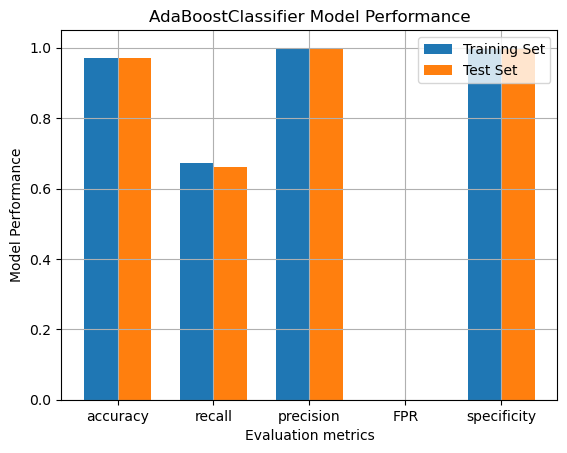

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Training set
confusion_matrix_train = confusion_matrix(y_train, train_pred)
TP_train = confusion_matrix_train[1,1]
TN_train = confusion_matrix_train[0,0]
FP_train = confusion_matrix_train[0,1]
FN_train = confusion_matrix_train[1,0]
result_df_train = {
    'accuracy': round((TP_train + TN_train) / float(TN_train + FP_train + TP_train + FN_train), 3),
    'recall': round((TP_train) / float(TP_train + FN_train), 3),
    'precision': round((TP_train) / float(TP_train + FP_train), 3),
    'FPR': round((FP_train) / float(TN_train + FP_train), 3),
    'specificity': round((TN_train) / float(TN_train + FP_train), 3)
}

# Test set
confusion_matrix_test = confusion_matrix(y_test, test_pred)
TP_test = confusion_matrix_test[1,1]
TN_test = confusion_matrix_test[0,0]
FP_test = confusion_matrix_test[0,1]
FN_test = confusion_matrix_test[1,0]
result_df_test = {
    'accuracy': round((TP_test + TN_test) / float(TN_test + FP_test + TP_test + FN_test), 3),
    'recall': round((TP_test) / float(TP_test + FN_test), 3),
    'precision': round((TP_test) / float(TP_test + FP_test), 3),
    'FPR': round((FP_test) / float(TN_test + FP_test), 3),
    'specificity': round((TN_test) / float(TN_test + FP_test), 3)
}

# Plotting
metrics = list(result_df_train.keys())
values_train = list(result_df_train.values())
values_test = list(result_df_test.values())

bar_width = 0.35
index = np.arange(len(metrics))

plt.bar(index, values_train, bar_width, label='Training Set')
plt.bar(index + bar_width, values_test, bar_width, label='Test Set')

plt.title('AdaBoostClassifier Model Performance')
plt.xlabel('Evaluation metrics')
plt.ylabel('Model Performance')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.grid(True)
plt.show()


In [99]:
import plotly.graph_objects as go
# Plotting
metrics = list(result_df_train.keys())
values_train = list(result_df_train.values())
values_test = list(result_df_test.values())

fig = go.Figure()
fig.add_trace(go.Bar(x=metrics, y=values_train,marker_color='#17becf', name='Training Result'))
fig.add_trace(go.Bar(x=metrics, y=values_test,marker_color='#e377c2', name='Test Result'))

fig.update_layout(
    title='AdaBoostClassifier Model Performance',
    xaxis_title='Evaluation metrics',
    yaxis_title='Model Performance',
    barmode='group'
)

fig.show()

In [91]:
def get_predictions(X_train,y_train):
    y_train_pred_final_ABC = pd.DataFrame({'Diabetes':y_train.values, 'Diabetes_Prob':clf2_ABC.predict_proba(X_train)[:,1]})
    y_train_pred_final_ABC['Patient_ID'] = y_train.index
    y_train_pred_final_ABC = y_train_pred_final_ABC.reindex(['Patient_ID','Diabetes','Diabetes_Prob'], axis=1)
    y_train_pred_final_ABC['predicted'] = y_train_pred_final_ABC.Diabetes_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final_ABC
    
y_train_pred_final_ABC=get_predictions(X_train,y_train)    
# Let's see the head
y_train_pred_final_ABC

,Patient_ID,Diabetes,Diabetes_Prob,predicted
0,31450,0,1.431483e-01,0
1,42809,0,1.009368e-13,0
2,52419,0,3.827425e-14,0
3,45663,0,1.009368e-13,0
4,50696,0,1.009368e-13,0
...,...,...,...,...
74995,63206,0,3.058346e-01,0
74996,61404,0,1.009368e-13,0
74997,17730,0,3.827425e-14,0
74998,28030,0,3.058346e-01,0


In [92]:
def get_predictions_on_test_data(X_test,y_test):
    y_test_pred_final_ABC = pd.DataFrame({'Diabetes':y_test.values, 'Diabetes_Prob':clf2_ABC.predict_proba(X_test)[:,1]})
    y_test_pred_final_ABC['Patient_ID'] = y_test.index
    y_test_pred_final_ABC = y_test_pred_final_ABC.reindex(['Patient_ID','Diabetes','Diabetes_Prob'], axis=1)
    y_test_pred_final_ABC['predicted'] = y_test_pred_final_ABC.Diabetes_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_test_pred_final_ABC
    
y_test_pred_final_ABC=get_predictions(X_test,y_test)    
# Let's see the head
y_test_pred_final_ABC.head()

,Patient_ID,Diabetes,Diabetes_Prob,predicted
0,42083,0,3.058346e-01,0
1,71825,0,1.009368e-13,0
2,99535,0,3.827425e-14,0
3,47879,0,3.058346e-01,0
4,36734,0,1.009368e-13,0


In [93]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final_ABC.Diabetes, y_train_pred_final_ABC.predicted )
print(confusion)

[[68675     0]
 [ 2077  4248]]


In [94]:

def generate_model_result_proba(y_train,predicted):
    confusion = confusion_matrix(y_train, predicted )
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    result_df={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}
    
    return result_df
    
result_df_train_ABC=generate_model_result_proba(y_train,y_train_pred_final_ABC['predicted'])
result_df_train_ABC

{'accuracy': 0.972,
 'recall': 0.672,
 'precision': 1.0,
 'FPR': 0.0,
 'specificity': 1.0}

In [95]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final_ABC.Diabetes, y_test_pred_final_ABC.predicted )

# Let's check the overall accuracy.
acc = metrics.accuracy_score(y_test_pred_final_ABC.Diabetes, y_test_pred_final_ABC.predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

recall = TP / float(TP+FN)

precision = TP / float(TP+FP)

fpr = FP/ float(TN+FP)

specificity = TN / float(TN+FP)

print('confusion_metrics\n {} \n Accuracy= {} / Recall= {} / Percision= {} / FPR= {} \n Specificity= {}'.format(confusion,acc, recall,precision,fpr,specificity))


confusion_metrics
 [[22825     0]
 [  736  1439]] 
 Accuracy= 0.97056 / Recall= 0.6616091954022989 / Percision= 1.0 / FPR= 0.0 
 Specificity= 1.0


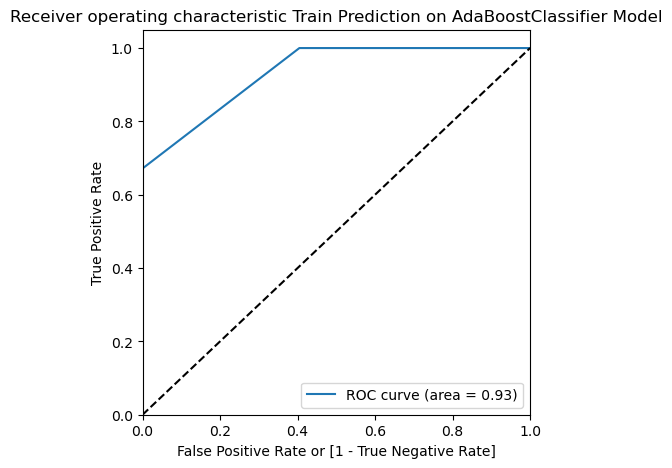

In [98]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Train Prediction on AdaBoostClassifier Model')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_train_pred_final_ABC.Diabetes, y_train_pred_final_ABC.Diabetes_Prob)

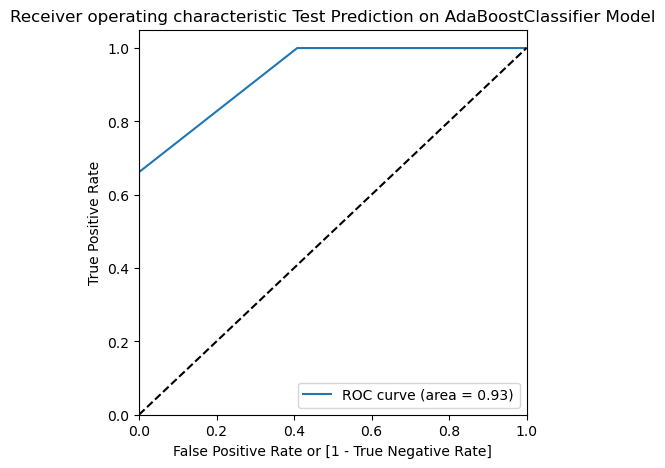

In [99]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Test Prediction on AdaBoostClassifier Model')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_test_pred_final_ABC.Diabetes, y_test_pred_final_ABC.Diabetes_Prob)

In [100]:
#in model building we prefer test dataset prediction probabilities to decide optimum threshold
#on test dataset 
y_test_pred_final_ABC

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final_ABC[i]= y_test_pred_final_ABC.Diabetes_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final_ABC.head()

,Patient_ID,Diabetes,Diabetes_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,42083,0,3.058346e-01,0,1,1,1,1,0,0,0,0,0,0
1,71825,0,1.009368e-13,0,1,0,0,0,0,0,0,0,0,0
2,99535,0,3.827425e-14,0,1,0,0,0,0,0,0,0,0,0
3,47879,0,3.058346e-01,0,1,1,1,1,0,0,0,0,0,0
4,36734,0,1.009368e-13,0,1,0,0,0,0,0,0,0,0,0


     threshold  accuracy  sensitivity  specificity
0.0        0.0   0.08700     1.000000     0.000000
0.1        0.1   0.46336     1.000000     0.412223
0.2        0.2   0.62724     1.000000     0.591720
0.3        0.3   0.62724     1.000000     0.591720
0.4        0.4   0.97056     0.661609     1.000000
0.5        0.5   0.97056     0.661609     1.000000
0.6        0.6   0.95284     0.457931     1.000000
0.7        0.7   0.95284     0.457931     1.000000
0.8        0.8   0.95284     0.457931     1.000000
0.9        0.9   0.95284     0.457931     1.000000


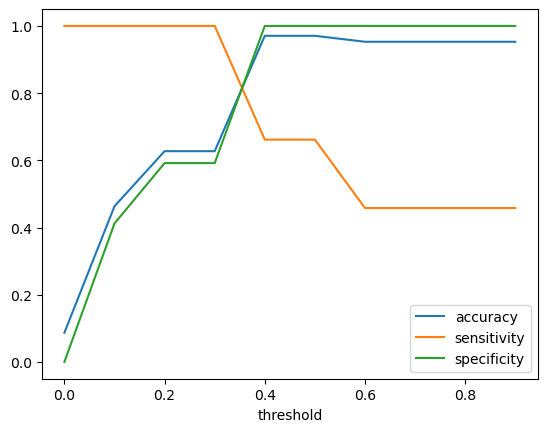

In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['threshold','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final_ABC.Diabetes, y_test_pred_final_ABC[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='threshold', y=['accuracy','sensitivity','specificity'])
plt.show()

# AdaBoostClassifier Results

# XGBClassifier Results

# GradientBoostingClassifier Results

# RandomForestClassifier Results

# Decision Tree Clasification Results